# Introduction
This project aims to investigate a novel type of synapse, termed the 'Honeycomb Synapse' for its unique postsynaptic nanostructure. This synapse, found in the mouse spinal cord, has only recently been described and this project aims to provide the first systematic characterisation of its properties. 
To this end, the initial aim of my project is to identify the neural circuitry associated with the Honeycomb Synapse. Based on pilot data we hypothesised that the Honeycomb Synapse is part of the Monosynaptic Stretch Reflex Pathway. This pathway is constituted of a 1a afferent neuron which synapses onto motoneurons in the spinal lumbar ventral horn. I therefore performed Immunohistochemistry to visualise Ia afferent neurons, pre-synaptic excitatory sites, post-synaptic sites, and motoneurons, by staining for Parvalbumin (PV), vesicular glutamate transporter 1 (VGLUT1), Postsynaptic Density Protein 95 (PSD95), and Matrix Metalloprotease-9 (MMP9), respectively. Subsequently, the tissue was imaged using confocal microscopy and analysed using the 3D imaging software IMARIS. In IMARIS, I trained a machine-learning algorithm to label PSD95 structures as Honeycom (HC) or Non-Honeycomb ('Other') Synapses. Data was extracted for each PSD95 cluster from 18 images, resulting in 18 separate excel tables, containing information on a large number of parameters. For this project, I was interested to analyse data regarding the distance of PSD95 clusters from PV and VGLUT1 as a measure of colocalisation, as well as data on volume and surface area ('area') of each PSD95 cluster. 
Due to the large size of the datasets, the first part of the code aims to extract relevant colocalisation, surface area, and volume data, generating three tables. The second part aims to merge these data into one summary table. The third part of the code will visualise the data, answering two key questions: (1) What percentage of HC compared to Non-HC Synapses are colocalised with PV and/or VGLUT1 and therefore part of the MSR, and (2) Do HC and Non-HC Synapses of the MSR differ in size?

# Part 1A - Extracting and Summarising Colocalisation Data

In [6]:
#loading relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [31]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [32]:
# Extracting excel file sheets containing information regarding the distance of a given PSD95 cluster (synapse) from VGLUT1, MMP9, and PV.
# Eliminating header

In [33]:
Coloc1a = pd.read_excel('2024-09-30_Slide2_Section2_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [34]:
Coloc1b = pd.read_excel('2024-09-30_Slide2_Section2_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [35]:
Coloc1c = pd.read_excel('2024-09-30_Slide2_Section2_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [44]:
Coloc2a = pd.read_excel('2024-10-02_Slide3_Section1_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [45]:
Coloc2b = pd.read_excel('2024-10-02_Slide3_Section1_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [46]:
Coloc2c = pd.read_excel('2024-10-02_Slide3_Section1_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [47]:
Coloc3a = pd.read_excel('2024-10-02_Slide3_Section1_SideA_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [48]:
Coloc3b = pd.read_excel('2024-10-02_Slide3_Section1_SideA_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [49]:
Coloc3c = pd.read_excel('2024-10-02_Slide3_Section1_SideA_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [50]:
Coloc4a = pd.read_excel('2024-10-02_Slide3_Section1_SideB_DL_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [51]:
Coloc4b = pd.read_excel('2024-10-02_Slide3_Section1_SideB_DL_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [52]:
Coloc4c = pd.read_excel('2024-10-02_Slide3_Section1_SideB_DL_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [53]:
Coloc5a = pd.read_excel('2024-10-02_Slide3_Section1_SideB_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [54]:
Coloc5b = pd.read_excel('2024-10-02_Slide3_Section1_SideB_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [55]:
Coloc5c = pd.read_excel('2024-10-02_Slide3_Section1_SideB_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [56]:
Coloc6a = pd.read_excel('2024-10-02_Slide3_Section1_SideB_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [57]:
Coloc6b = pd.read_excel('2024-10-02_Slide3_Section1_SideB_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [58]:
Coloc6c = pd.read_excel('2024-10-02_Slide3_Section1_SideB_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [59]:
Coloc7a = pd.read_excel('2024-10-02_Slide3_Section2_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [60]:
Coloc7b = pd.read_excel('2024-10-02_Slide3_Section2_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [61]:
Coloc7c = pd.read_excel('2024-10-02_Slide3_Section2_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [62]:
Coloc8a = pd.read_excel('2024-10-02_Slide3_Section2_SideA_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [63]:
Coloc8b = pd.read_excel('2024-10-02_Slide3_Section2_SideA_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [64]:
Coloc8c = pd.read_excel('2024-10-02_Slide3_Section2_SideA_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [65]:
Coloc9a = pd.read_excel('2024-10-02_Slide3_Section2_SideB_L2_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [66]:
Coloc9b = pd.read_excel('2024-10-02_Slide3_Section2_SideB_L2_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [67]:
Coloc9c = pd.read_excel('2024-10-02_Slide3_Section2_SideB_L2_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [68]:
Coloc10a = pd.read_excel('2024-10-02_Slide3_Section2_SideB_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [69]:
Coloc10b = pd.read_excel('2024-10-02_Slide3_Section2_SideB_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [70]:
Coloc10c = pd.read_excel('2024-10-02_Slide3_Section2_SideB_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [71]:
Coloc11a = pd.read_excel('2024-10-02_Slide3_Section3_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [72]:
Coloc11b = pd.read_excel('2024-10-02_Slide3_Section3_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [73]:
Coloc11c = pd.read_excel('2024-10-02_Slide3_Section3_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [74]:
Coloc12a = pd.read_excel('2024-10-02_Slide3_Section4_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [75]:
Coloc12b = pd.read_excel('2024-10-02_Slide3_Section4_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [76]:
Coloc12c = pd.read_excel('2024-10-02_Slide3_Section4_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [77]:
Coloc13a = pd.read_excel('2024-10-02_Slide4_Section1_SideB_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [78]:
Coloc13b = pd.read_excel('2024-10-02_Slide4_Section1_SideB_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [79]:
Coloc13c = pd.read_excel('2024-10-02_Slide4_Section1_SideB_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [80]:
Coloc14a = pd.read_excel('2024-10-02_Slide4_Section2_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [81]:
Coloc14b = pd.read_excel('2024-10-02_Slide4_Section2_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [82]:
Coloc14c = pd.read_excel('2024-10-02_Slide4_Section2_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [83]:
Coloc15a = pd.read_excel('2024-10-02_Slide4_Section5_SideB_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [84]:
Coloc15b = pd.read_excel('2024-10-02_Slide4_Section5_SideB_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [85]:
Coloc15c = pd.read_excel('2024-10-02_Slide4_Section5_SideB_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [86]:
Coloc16a = pd.read_excel('2024-10-03_Slide1_Section3_SideA_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [87]:
Coloc16b = pd.read_excel('2024-10-03_Slide1_Section3_SideA_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [88]:
Coloc16c = pd.read_excel('2024-10-03_Slide1_Section3_SideA_M_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [89]:
Coloc17a = pd.read_excel('2024-10-03_Slide1_Section3_SideB_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [90]:
Coloc17b = pd.read_excel('2024-10-03_Slide1_Section3_SideB_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [91]:
Coloc17c = pd.read_excel('2024-10-03_Slide1_Section3_SideB_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

In [92]:
Coloc18a = pd.read_excel('2024-10-03_Slide1_Section5_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-46', header = None)

In [93]:
Coloc18b = pd.read_excel('2024-10-03_Slide1_Section5_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-47', header = None)

In [94]:
Coloc18c = pd.read_excel('2024-10-03_Slide1_Section5_SideA_L_CL_PSD95.xls', sheet_name='Shortest Distance to Surfac-48', header = None)

### Image 1 - Colocalisation

#### Reformatting the dataframe to set the correct row as header.

In [36]:
Coloc1a.columns = Coloc1a.iloc[1]  # Set second row as header
Coloc1a = Coloc1a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc1a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0,µm,Surface,VGLUT1,1,Other,3
1,4.88405,µm,Surface,VGLUT1,1,Other,4
2,1.71514,µm,Surface,VGLUT1,1,Other,8
3,0,µm,Surface,VGLUT1,1,Other,9
4,2.90312,µm,Surface,VGLUT1,1,Other,13


In [37]:
Coloc1b.columns = Coloc1b.iloc[1]  # Set second row as header
Coloc1b = Coloc1b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc1b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,7.62395,µm,Surface,MMP9,1,Other,3
1,7.03561,µm,Surface,MMP9,1,Other,4
2,1.36849,µm,Surface,MMP9,1,Other,8
3,1.14708,µm,Surface,MMP9,1,Other,9
4,2.90494,µm,Surface,MMP9,1,Other,13


In [38]:
Coloc1c.columns = Coloc1c.iloc[1]  # Set second row as header
Coloc1c = Coloc1c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc1c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,1.68686,µm,Surface,PV,1,Other,3
1,0.011833,µm,Surface,PV,1,Other,4
2,2.90932,µm,Surface,PV,1,Other,8
3,3.57838,µm,Surface,PV,1,Other,9
4,1.76796,µm,Surface,PV,1,Other,13


#### Renaming columns for clarity and to avoid duplicates. 
#### Merging Image 1 colocalisation data for PV, VGLUT1, and MMP9.


In [39]:
# Renaming 'Shortest Distance to Surfaces' column to 'Shortest Distance to VGLUT1'
Coloc1a = Coloc1a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc1a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,0,µm,Surface,VGLUT1,1,Other,3
1,4.88405,µm,Surface,VGLUT1,1,Other,4
2,1.71514,µm,Surface,VGLUT1,1,Other,8
3,0,µm,Surface,VGLUT1,1,Other,9
4,2.90312,µm,Surface,VGLUT1,1,Other,13


In [40]:
# Merging dataframes on ID, keeping only columns 'ID' and 'Shortest Distance to Surfaces
# Renaming 'Shortest Distance to Surfaces' column to 'Shortest Distance to PV' and 'Shortest Distance to MMP9', respectively

Coloc1merged = pd.merge(Coloc1a, Coloc1c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc1merged.head()
Coloc1 = pd.merge(Coloc1merged, Coloc1b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc1.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,0,µm,Surface,VGLUT1,1,Other,3,1.68686,7.62395
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.03561
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.90932,1.36849
3,0,µm,Surface,VGLUT1,1,Other,9,3.57838,1.14708
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.76796,2.90494


The above steps are repeated for all images.
Note that images 6-8 do not contain information in the unit column. This has been traced back to an error when extracting the data in IMARIS.

In [95]:
Coloc1

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position
0,0,µm,Surface,VGLUT1,1,Other,3,1.68686,7.62395,L
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.03561,L
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.90932,1.36849,L
3,0,µm,Surface,VGLUT1,1,Other,9,3.57838,1.14708,L
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.76796,2.90494,L
...,...,...,...,...,...,...,...,...,...,...
43951,1.56373,µm,Surface,VGLUT1,1,Other,96846,3.62665,3.19657,L
43952,2.04199,µm,Surface,VGLUT1,1,Other,96850,1.22421,5.81211,L
43953,3.7398,µm,Surface,VGLUT1,1,Other,96854,2.24553,1.16076,L
43954,0.624008,µm,Surface,VGLUT1,1,Other,96855,1.98796,4.20669,L


In [42]:
Coloc1['Position'] = 'L'

# Image 2 - Colocalisation

In [96]:
Coloc2a.columns = Coloc2a.iloc[1]  # Set second row as header
Coloc2a = Coloc2a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc2a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,2.81183,µm,Surface,VGLUT1,1,Other,0
1,3.50721,µm,Surface,VGLUT1,1,Other,1
2,19.8958,µm,Surface,VGLUT1,1,Other,3
3,2.03823,µm,Surface,VGLUT1,1,Other,4
4,5.85644,µm,Surface,VGLUT1,1,Other,5


In [97]:
Coloc2b.columns = Coloc2b.iloc[1]  # Set second row as header
Coloc2b = Coloc2b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc2b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,2.71887,µm,Surface,MMP9,1,Other,0
1,3.02492,µm,Surface,MMP9,1,Other,1
2,5.55014,µm,Surface,MMP9,1,Other,3
3,4.58034,µm,Surface,MMP9,1,Other,4
4,1.70572,µm,Surface,MMP9,1,Other,5


In [98]:
Coloc2c.columns = Coloc2c.iloc[1]  # Set second row as header
Coloc2c = Coloc2c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc2c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0.504366,µm,Surface,PV,1,Other,0
1,1.0752,µm,Surface,PV,1,Other,1
2,2.01262,µm,Surface,PV,1,Other,3
3,0.916798,µm,Surface,PV,1,Other,4
4,4.63057,µm,Surface,PV,1,Other,5


In [99]:
Coloc2a = Coloc2a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc2a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,2.81183,µm,Surface,VGLUT1,1,Other,0
1,3.50721,µm,Surface,VGLUT1,1,Other,1
2,19.8958,µm,Surface,VGLUT1,1,Other,3
3,2.03823,µm,Surface,VGLUT1,1,Other,4
4,5.85644,µm,Surface,VGLUT1,1,Other,5


In [100]:
Coloc2merged = pd.merge(Coloc2a, Coloc2c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc2merged.head()
Coloc2 = pd.merge(Coloc2merged, Coloc2b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc2.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,2.81183,µm,Surface,VGLUT1,1,Other,0,0.504366,2.71887
1,3.50721,µm,Surface,VGLUT1,1,Other,1,1.0752,3.02492
2,19.8958,µm,Surface,VGLUT1,1,Other,3,2.01262,5.55014
3,2.03823,µm,Surface,VGLUT1,1,Other,4,0.916798,4.58034
4,5.85644,µm,Surface,VGLUT1,1,Other,5,4.63057,1.70572


In [101]:
Coloc2['Position'] = 'L'

# Image 3 - Colocalisation

In [102]:
Coloc3a.columns = Coloc3a.iloc[1]  # Set second row as header
Coloc3a = Coloc3a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc3a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,6.60668,µm,Surface,VGLUT1,1,Other,1
1,4.76082,µm,Surface,VGLUT1,1,Other,2
2,1.2117,µm,Surface,VGLUT1,1,Other,4
3,3.60222,µm,Surface,VGLUT1,1,Other,7
4,2.24468,µm,Surface,VGLUT1,1,Other,8


In [103]:
Coloc3b.columns = Coloc3b.iloc[1]  # Set second row as header
Coloc3b = Coloc3b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc3b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,3.26549,µm,Surface,MMP9,1,Other,1
1,9.57648,µm,Surface,MMP9,1,Other,2
2,2.11548,µm,Surface,MMP9,1,Other,4
3,1.1511,µm,Surface,MMP9,1,Other,7
4,7.3411,µm,Surface,MMP9,1,Other,8


In [104]:
Coloc3c.columns = Coloc3c.iloc[1]  # Set second row as header
Coloc3c = Coloc3c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc3c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0,µm,Surface,PV,1,Other,1
1,2.03484,µm,Surface,PV,1,Other,2
2,0,µm,Surface,PV,1,Other,4
3,0.577831,µm,Surface,PV,1,Other,7
4,1.47851,µm,Surface,PV,1,Other,8


In [105]:
Coloc3a = Coloc3a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc3a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,6.60668,µm,Surface,VGLUT1,1,Other,1
1,4.76082,µm,Surface,VGLUT1,1,Other,2
2,1.2117,µm,Surface,VGLUT1,1,Other,4
3,3.60222,µm,Surface,VGLUT1,1,Other,7
4,2.24468,µm,Surface,VGLUT1,1,Other,8


In [106]:
Coloc3merged = pd.merge(Coloc3a, Coloc3c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc3merged.head()
Coloc3 = pd.merge(Coloc3merged, Coloc3b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc3.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,6.60668,µm,Surface,VGLUT1,1,Other,1,0,3.26549
1,4.76082,µm,Surface,VGLUT1,1,Other,2,2.03484,9.57648
2,1.2117,µm,Surface,VGLUT1,1,Other,4,0,2.11548
3,3.60222,µm,Surface,VGLUT1,1,Other,7,0.577831,1.1511
4,2.24468,µm,Surface,VGLUT1,1,Other,8,1.47851,7.3411


In [107]:
Coloc3['Position'] = 'M'

# Image 4 - Colocalisation

In [108]:
Coloc4a.columns = Coloc4a.iloc[1]  # Set second row as header
Coloc4a = Coloc4a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc4a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,3.4899,µm,Surface,VGLUT1,1,Other,0
1,2.45342,µm,Surface,VGLUT1,1,Other,1
2,3.74471,µm,Surface,VGLUT1,1,Other,2
3,3.48682,µm,Surface,VGLUT1,1,Other,3
4,0.430369,µm,Surface,VGLUT1,1,Other,5


In [109]:
Coloc4b.columns = Coloc4b.iloc[1]  # Set second row as header
Coloc4b = Coloc4b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc4b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,14.6344,µm,Surface,MMP9,1,Other,0
1,3.55047,µm,Surface,MMP9,1,Other,1
2,6.40466,µm,Surface,MMP9,1,Other,2
3,6.73547,µm,Surface,MMP9,1,Other,3
4,0,µm,Surface,MMP9,1,Other,5


In [110]:
Coloc4c.columns = Coloc4c.iloc[1]  # Set second row as header
Coloc4c = Coloc4c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc4c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,2.28674,µm,Surface,PV,1,Other,0
1,1.3739,µm,Surface,PV,1,Other,1
2,1.30199,µm,Surface,PV,1,Other,2
3,2.67576,µm,Surface,PV,1,Other,3
4,0,µm,Surface,PV,1,Other,5


In [111]:
Coloc4a = Coloc4a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc4a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,3.4899,µm,Surface,VGLUT1,1,Other,0
1,2.45342,µm,Surface,VGLUT1,1,Other,1
2,3.74471,µm,Surface,VGLUT1,1,Other,2
3,3.48682,µm,Surface,VGLUT1,1,Other,3
4,0.430369,µm,Surface,VGLUT1,1,Other,5


In [112]:
Coloc4merged = pd.merge(Coloc4a, Coloc4c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc4merged.head()
Coloc4 = pd.merge(Coloc4merged, Coloc4b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc4.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,3.4899,µm,Surface,VGLUT1,1,Other,0,2.28674,14.6344
1,2.45342,µm,Surface,VGLUT1,1,Other,1,1.3739,3.55047
2,3.74471,µm,Surface,VGLUT1,1,Other,2,1.30199,6.40466
3,3.48682,µm,Surface,VGLUT1,1,Other,3,2.67576,6.73547
4,0.430369,µm,Surface,VGLUT1,1,Other,5,0,0


In [113]:
Coloc4['Position'] = 'L'

# Image 5 - Colocalisation

In [114]:
Coloc5a.columns = Coloc5a.iloc[1]  # Set second row as header
Coloc5a = Coloc5a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc5a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,4.17561,µm,Surface,VGLUT1,1,Other,0
1,7.12177,µm,Surface,VGLUT1,1,Other,1
2,0.929882,µm,Surface,VGLUT1,1,Other,2
3,0,µm,Surface,VGLUT1,1,Other,3
4,2.53153,µm,Surface,VGLUT1,1,Other,4


In [115]:
Coloc5b.columns = Coloc5b.iloc[1]  # Set second row as header
Coloc5b = Coloc5b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc5b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0.832739,µm,Surface,MMP9,1,Other,0
1,1.13446,µm,Surface,MMP9,1,Other,1
2,2.79923,µm,Surface,MMP9,1,Other,2
3,4.75544,µm,Surface,MMP9,1,Other,3
4,2.7245,µm,Surface,MMP9,1,Other,4


In [116]:
Coloc5c.columns = Coloc5c.iloc[1]  # Set second row as header
Coloc5c = Coloc5c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc5c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0,µm,Surface,PV,1,Other,0
1,1.90773,µm,Surface,PV,1,Other,1
2,0.755032,µm,Surface,PV,1,Other,2
3,-0.429244,µm,Surface,PV,1,Other,3
4,1.12521,µm,Surface,PV,1,Other,4


In [117]:
Coloc5a = Coloc5a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc5a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,4.17561,µm,Surface,VGLUT1,1,Other,0
1,7.12177,µm,Surface,VGLUT1,1,Other,1
2,0.929882,µm,Surface,VGLUT1,1,Other,2
3,0,µm,Surface,VGLUT1,1,Other,3
4,2.53153,µm,Surface,VGLUT1,1,Other,4


In [118]:
Coloc5merged = pd.merge(Coloc5a, Coloc5c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc5merged.head()
Coloc5 = pd.merge(Coloc5merged, Coloc5b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc5.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,4.17561,µm,Surface,VGLUT1,1,Other,0,0,0.832739
1,7.12177,µm,Surface,VGLUT1,1,Other,1,1.90773,1.13446
2,0.929882,µm,Surface,VGLUT1,1,Other,2,0.755032,2.79923
3,0,µm,Surface,VGLUT1,1,Other,3,-0.429244,4.75544
4,2.53153,µm,Surface,VGLUT1,1,Other,4,1.12521,2.7245


In [119]:
Coloc5['Position'] = 'L'

# Image 6 - Colocalisation

In [120]:
Coloc6a.columns = Coloc6a.iloc[1]  # Set second row as header
Coloc6a = Coloc6a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc6a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,5.92659,NaN,Surface,VGLUT1,1,Other,3
1,0.569774,NaN,Surface,VGLUT1,1,Other,4
2,4.15559,NaN,Surface,VGLUT1,1,Other,5
3,2.60946,NaN,Surface,VGLUT1,1,Other,6
4,3.06393,NaN,Surface,VGLUT1,1,Other,8


In [121]:
Coloc6b.columns = Coloc6b.iloc[1]  # Set second row as header
Coloc6b = Coloc6b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc6b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,-0.20304,NaN,Surface,PV,1,Other,3
1,0.441646,NaN,Surface,PV,1,Other,4
2,0.741846,NaN,Surface,PV,1,Other,5
3,0,NaN,Surface,PV,1,Other,6
4,0.385251,NaN,Surface,PV,1,Other,8


In [122]:
Coloc6c.columns = Coloc6c.iloc[1]  # Set second row as header
Coloc6c = Coloc6c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc6c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0,NaN,Surface,MMP9,1,Other,3
1,5.05369,NaN,Surface,MMP9,1,Other,4
2,3.54106,NaN,Surface,MMP9,1,Other,5
3,4.1763,NaN,Surface,MMP9,1,Other,6
4,2.93849,NaN,Surface,MMP9,1,Other,8


In [123]:
Coloc6a = Coloc6a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc6a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,5.92659,NaN,Surface,VGLUT1,1,Other,3
1,0.569774,NaN,Surface,VGLUT1,1,Other,4
2,4.15559,NaN,Surface,VGLUT1,1,Other,5
3,2.60946,NaN,Surface,VGLUT1,1,Other,6
4,3.06393,NaN,Surface,VGLUT1,1,Other,8


In [124]:
Coloc6merged = pd.merge(Coloc6a, Coloc6b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc6merged.head()
Coloc6 = pd.merge(Coloc6merged, Coloc6c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc6.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,5.92659,NaN,Surface,VGLUT1,1,Other,3,-0.20304,0
1,0.569774,NaN,Surface,VGLUT1,1,Other,4,0.441646,5.05369
2,4.15559,NaN,Surface,VGLUT1,1,Other,5,0.741846,3.54106
3,2.60946,NaN,Surface,VGLUT1,1,Other,6,0,4.1763
4,3.06393,NaN,Surface,VGLUT1,1,Other,8,0.385251,2.93849


In [125]:
Coloc6['Position'] = 'M'

# Image 7 - Colocalisation

In [126]:
Coloc7a.columns = Coloc7a.iloc[1]  # Set second row as header
Coloc7a = Coloc7a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc7a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,6.36844,NaN,Surface,VGLUT1,1,Other,0
1,6.76685,NaN,Surface,VGLUT1,1,Other,1
2,3.4409,NaN,Surface,VGLUT1,1,Other,3
3,3.5085,NaN,Surface,VGLUT1,1,Other,5
4,3.49365,NaN,Surface,VGLUT1,1,Other,6


In [127]:
Coloc7b.columns = Coloc7b.iloc[1]  # Set second row as header
Coloc7b = Coloc7b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc7b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,4.02419,NaN,Surface,MMP9,1,Other,0
1,0.754587,NaN,Surface,MMP9,1,Other,1
2,0,NaN,Surface,MMP9,1,Other,3
3,0.27011,NaN,Surface,MMP9,1,Other,5
4,2.73925,NaN,Surface,MMP9,1,Other,6


In [128]:
Coloc7c.columns = Coloc7c.iloc[1]  # Set second row as header
Coloc7c = Coloc7c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc7c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0,NaN,Surface,PV,1,Other,0
1,0,NaN,Surface,PV,1,Other,1
2,1.65703,NaN,Surface,PV,1,Other,3
3,0.055336,NaN,Surface,PV,1,Other,5
4,0.544455,NaN,Surface,PV,1,Other,6


In [129]:
Coloc7a = Coloc7a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc7a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,6.36844,NaN,Surface,VGLUT1,1,Other,0
1,6.76685,NaN,Surface,VGLUT1,1,Other,1
2,3.4409,NaN,Surface,VGLUT1,1,Other,3
3,3.5085,NaN,Surface,VGLUT1,1,Other,5
4,3.49365,NaN,Surface,VGLUT1,1,Other,6


In [130]:
Coloc7merged = pd.merge(Coloc7a, Coloc7c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc7merged.head()
Coloc7 = pd.merge(Coloc7merged, Coloc7b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc7.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,6.36844,NaN,Surface,VGLUT1,1,Other,0,0,4.02419
1,6.76685,NaN,Surface,VGLUT1,1,Other,1,0,0.754587
2,3.4409,NaN,Surface,VGLUT1,1,Other,3,1.65703,0
3,3.5085,NaN,Surface,VGLUT1,1,Other,5,0.055336,0.27011
4,3.49365,NaN,Surface,VGLUT1,1,Other,6,0.544455,2.73925


In [131]:
Coloc7['Position'] = 'L'

# Image 8 - Colocalisation

In [132]:
Coloc8a.columns = Coloc8a.iloc[1]  # Set second row as header
Coloc8a = Coloc8a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc8a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,1.13632,NaN,Surface,VGLUT1,1,Other,0
1,0.959514,NaN,Surface,VGLUT1,1,Other,1
2,7.0936,NaN,Surface,VGLUT1,1,Other,2
3,3.49454,NaN,Surface,VGLUT1,1,Other,3
4,0,NaN,Surface,VGLUT1,1,Other,4


In [133]:
Coloc8b.columns = Coloc8b.iloc[1]  # Set second row as header
Coloc8b = Coloc8b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc8b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,3.56385,NaN,Surface,MMP9,1,Other,0
1,2.99968,NaN,Surface,MMP9,1,Other,1
2,2.76268,NaN,Surface,MMP9,1,Other,2
3,0,NaN,Surface,MMP9,1,Other,3
4,2.9657,NaN,Surface,MMP9,1,Other,4


In [134]:
Coloc8c.columns = Coloc8c.iloc[1]  # Set second row as header
Coloc8c = Coloc8c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc8c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0,NaN,Surface,PV,1,Other,0
1,0.882443,NaN,Surface,PV,1,Other,1
2,2.68518,NaN,Surface,PV,1,Other,2
3,2.60688,NaN,Surface,PV,1,Other,3
4,2.54815,NaN,Surface,PV,1,Other,4


In [135]:
Coloc8a = Coloc8a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc8a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,1.13632,NaN,Surface,VGLUT1,1,Other,0
1,0.959514,NaN,Surface,VGLUT1,1,Other,1
2,7.0936,NaN,Surface,VGLUT1,1,Other,2
3,3.49454,NaN,Surface,VGLUT1,1,Other,3
4,0,NaN,Surface,VGLUT1,1,Other,4


In [136]:
Coloc8merged = pd.merge(Coloc8a, Coloc8c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc8merged.head()
Coloc8 = pd.merge(Coloc8merged, Coloc8b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc8.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,1.13632,NaN,Surface,VGLUT1,1,Other,0,0,3.56385
1,0.959514,NaN,Surface,VGLUT1,1,Other,1,0.882443,2.99968
2,7.0936,NaN,Surface,VGLUT1,1,Other,2,2.68518,2.76268
3,3.49454,NaN,Surface,VGLUT1,1,Other,3,2.60688,0
4,0,NaN,Surface,VGLUT1,1,Other,4,2.54815,2.9657


In [137]:
Coloc8['Position'] = 'M'

# Image 9 - Colocalisation

In [138]:
Coloc9a.columns = Coloc9a.iloc[1]  # Set second row as header
Coloc9a = Coloc9a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc9a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,1.93186,µm,Surface,VGLUT1,1,Other,0
1,1.38091,µm,Surface,VGLUT1,1,Other,1
2,3.41417,µm,Surface,VGLUT1,1,Other,2
3,3.25653,µm,Surface,VGLUT1,1,Other,3
4,1.51469,µm,Surface,VGLUT1,1,Other,4


In [139]:
Coloc9b.columns = Coloc9b.iloc[1]  # Set second row as header
Coloc9b = Coloc9b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc9b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,2.81451,µm,Surface,MMP9,1,Other,0
1,2.27686,µm,Surface,MMP9,1,Other,1
2,3.32926,µm,Surface,MMP9,1,Other,2
3,4.81685,µm,Surface,MMP9,1,Other,3
4,1.26297,µm,Surface,MMP9,1,Other,4


In [140]:
Coloc9c.columns = Coloc9c.iloc[1]  # Set second row as header
Coloc9c = Coloc9c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc9c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0.158782,µm,Surface,PV,1,Other,0
1,0,µm,Surface,PV,1,Other,1
2,2.06261,µm,Surface,PV,1,Other,2
3,1.26488,µm,Surface,PV,1,Other,3
4,-0.60231,µm,Surface,PV,1,Other,4


In [141]:
Coloc9a = Coloc9a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc9a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,1.93186,µm,Surface,VGLUT1,1,Other,0
1,1.38091,µm,Surface,VGLUT1,1,Other,1
2,3.41417,µm,Surface,VGLUT1,1,Other,2
3,3.25653,µm,Surface,VGLUT1,1,Other,3
4,1.51469,µm,Surface,VGLUT1,1,Other,4


In [142]:
Coloc9merged = pd.merge(Coloc9a, Coloc9c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc9merged.head()
Coloc9 = pd.merge(Coloc9merged, Coloc9b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc9.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,1.93186,µm,Surface,VGLUT1,1,Other,0,0.158782,2.81451
1,1.38091,µm,Surface,VGLUT1,1,Other,1,0,2.27686
2,3.41417,µm,Surface,VGLUT1,1,Other,2,2.06261,3.32926
3,3.25653,µm,Surface,VGLUT1,1,Other,3,1.26488,4.81685
4,1.51469,µm,Surface,VGLUT1,1,Other,4,-0.60231,1.26297


In [143]:
Coloc9['Position'] = 'L'

# Image 10 - Colocalisation

In [144]:
Coloc10a.columns = Coloc10a.iloc[1]  # Set second row as header
Coloc10a = Coloc10a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc10a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,1.47796,µm,Surface,VGLUT1,1,Other,1
1,3.51244,µm,Surface,VGLUT1,1,Other,4
2,3.2792,µm,Surface,VGLUT1,1,Other,5
3,3.59969,µm,Surface,VGLUT1,1,Other,6
4,5.24895,µm,Surface,VGLUT1,1,Other,7


In [145]:
Coloc10b.columns = Coloc10b.iloc[1]  # Set second row as header
Coloc10b = Coloc10b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc10b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0.825514,µm,Surface,MMP9,1,Other,1
1,2.32512,µm,Surface,MMP9,1,Other,4
2,1.38073,µm,Surface,MMP9,1,Other,5
3,2.34673,µm,Surface,MMP9,1,Other,6
4,5.01675,µm,Surface,MMP9,1,Other,7


In [146]:
Coloc10c.columns = Coloc10c.iloc[1]  # Set second row as header
Coloc10c = Coloc10c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc10c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0.392945,µm,Surface,PV,1,Other,1
1,0.097583,µm,Surface,PV,1,Other,4
2,2.14268,µm,Surface,PV,1,Other,5
3,3.32757,µm,Surface,PV,1,Other,6
4,0,µm,Surface,PV,1,Other,7


In [147]:
Coloc10a = Coloc10a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc10a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,1.47796,µm,Surface,VGLUT1,1,Other,1
1,3.51244,µm,Surface,VGLUT1,1,Other,4
2,3.2792,µm,Surface,VGLUT1,1,Other,5
3,3.59969,µm,Surface,VGLUT1,1,Other,6
4,5.24895,µm,Surface,VGLUT1,1,Other,7


In [148]:
Coloc10merged = pd.merge(Coloc10a, Coloc10c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc10merged.head()
Coloc10 = pd.merge(Coloc10merged, Coloc10b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc10.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,1.47796,µm,Surface,VGLUT1,1,Other,1,0.392945,0.825514
1,3.51244,µm,Surface,VGLUT1,1,Other,4,0.097583,2.32512
2,3.2792,µm,Surface,VGLUT1,1,Other,5,2.14268,1.38073
3,3.59969,µm,Surface,VGLUT1,1,Other,6,3.32757,2.34673
4,5.24895,µm,Surface,VGLUT1,1,Other,7,0,5.01675


In [149]:
Coloc10['Position'] = 'M'

# Image 11 - Colocalisation

In [150]:
Coloc11a.columns = Coloc11a.iloc[1]  # Set second row as header
Coloc11a = Coloc11a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc11a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,4.88243,µm,Surface,VGLUT1,1,Other,3
1,2.84528,µm,Surface,VGLUT1,1,Other,6
2,3.72775,µm,Surface,VGLUT1,1,Other,7
3,3.25552,µm,Surface,VGLUT1,1,Other,8
4,1.77648,µm,Surface,VGLUT1,1,Other,10


In [151]:
Coloc11b.columns = Coloc11b.iloc[1]  # Set second row as header
Coloc11b = Coloc11b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc11b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,4.67041,µm,Surface,MMP9,1,Other,3
1,3.32597,µm,Surface,MMP9,1,Other,6
2,0,µm,Surface,MMP9,1,Other,7
3,2.57991,µm,Surface,MMP9,1,Other,8
4,5.0811,µm,Surface,MMP9,1,Other,10


In [152]:
Coloc11c.columns = Coloc11c.iloc[1]  # Set second row as header
Coloc11c = Coloc11c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc11c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,1.63445,µm,Surface,PV,1,Other,3
1,1.13149,µm,Surface,PV,1,Other,6
2,0.666337,µm,Surface,PV,1,Other,7
3,1.82263,µm,Surface,PV,1,Other,8
4,1.2447,µm,Surface,PV,1,Other,10


In [153]:
Coloc11a = Coloc11a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc11a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,4.88243,µm,Surface,VGLUT1,1,Other,3
1,2.84528,µm,Surface,VGLUT1,1,Other,6
2,3.72775,µm,Surface,VGLUT1,1,Other,7
3,3.25552,µm,Surface,VGLUT1,1,Other,8
4,1.77648,µm,Surface,VGLUT1,1,Other,10


In [154]:
Coloc11merged = pd.merge(Coloc11a, Coloc11c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc11merged.head()
Coloc11 = pd.merge(Coloc11merged, Coloc11b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc11.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,4.88243,µm,Surface,VGLUT1,1,Other,3,1.63445,4.67041
1,2.84528,µm,Surface,VGLUT1,1,Other,6,1.13149,3.32597
2,3.72775,µm,Surface,VGLUT1,1,Other,7,0.666337,0
3,3.25552,µm,Surface,VGLUT1,1,Other,8,1.82263,2.57991
4,1.77648,µm,Surface,VGLUT1,1,Other,10,1.2447,5.0811


In [155]:
Coloc11['Position'] = 'L'

# Image 12 - Colocalisation

In [156]:
Coloc12a.columns = Coloc12a.iloc[1]  # Set second row as header
Coloc12a = Coloc12a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc12a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,1.29687,µm,Surface,VGLUT1,1,Other,0
1,10.981,µm,Surface,VGLUT1,1,Other,1
2,1.35339,µm,Surface,VGLUT1,1,Other,2
3,0.923607,µm,Surface,VGLUT1,1,Other,3
4,1.35865,µm,Surface,VGLUT1,1,Other,4


In [157]:
Coloc12b.columns = Coloc12b.iloc[1]  # Set second row as header
Coloc12b = Coloc12b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc12b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0,µm,Surface,MMP9,1,Other,0
1,2.08965,µm,Surface,MMP9,1,Other,1
2,0.173911,µm,Surface,MMP9,1,Other,2
3,5.13684,µm,Surface,MMP9,1,Other,3
4,5.59758,µm,Surface,MMP9,1,Other,4


In [158]:
Coloc12c.columns = Coloc12c.iloc[1]  # Set second row as header
Coloc12c = Coloc12c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc12c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0,µm,Surface,PV,1,Other,0
1,0.250594,µm,Surface,PV,1,Other,1
2,-0.860891,µm,Surface,PV,1,Other,2
3,0.731554,µm,Surface,PV,1,Other,3
4,0.224507,µm,Surface,PV,1,Other,4


In [159]:
Coloc12a = Coloc12a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc12a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,1.29687,µm,Surface,VGLUT1,1,Other,0
1,10.981,µm,Surface,VGLUT1,1,Other,1
2,1.35339,µm,Surface,VGLUT1,1,Other,2
3,0.923607,µm,Surface,VGLUT1,1,Other,3
4,1.35865,µm,Surface,VGLUT1,1,Other,4


In [160]:
Coloc12merged = pd.merge(Coloc12a, Coloc12c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc12merged.head()
Coloc12 = pd.merge(Coloc12merged, Coloc12b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc12.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,1.29687,µm,Surface,VGLUT1,1,Other,0,0,0
1,10.981,µm,Surface,VGLUT1,1,Other,1,0.250594,2.08965
2,1.35339,µm,Surface,VGLUT1,1,Other,2,-0.860891,0.173911
3,0.923607,µm,Surface,VGLUT1,1,Other,3,0.731554,5.13684
4,1.35865,µm,Surface,VGLUT1,1,Other,4,0.224507,5.59758


In [161]:
Coloc12['Position'] = 'L'

# Image 13 - Colocalisation

In [162]:
Coloc13a.columns = Coloc13a.iloc[1]  # Set second row as header
Coloc13a = Coloc13a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc13a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,8.50215,µm,Surface,VGLUT1,1,Other,0
1,5.61524,µm,Surface,VGLUT1,1,Other,1
2,8.2788,µm,Surface,VGLUT1,1,Other,5
3,10.0147,µm,Surface,VGLUT1,1,Other,8
4,16.945,µm,Surface,VGLUT1,1,Other,10


In [163]:
Coloc13b.columns = Coloc13b.iloc[1]  # Set second row as header
Coloc13b = Coloc13b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc13b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,2.0409,NaN,Surface,PV,1,Other,0
1,3.84451,NaN,Surface,PV,1,Other,1
2,0,NaN,Surface,PV,1,Other,5
3,0.17556,NaN,Surface,PV,1,Other,8
4,1.89198,NaN,Surface,PV,1,Other,10


In [164]:
Coloc13c.columns = Coloc13c.iloc[1]  # Set second row as header
Coloc13c = Coloc13c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc13c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,1.04721,NaN,Surface,MMP9,1,Other,0
1,2.31753,NaN,Surface,MMP9,1,Other,1
2,6.44372,NaN,Surface,MMP9,1,Other,5
3,1.19674,NaN,Surface,MMP9,1,Other,8
4,5.5635,NaN,Surface,MMP9,1,Other,10


In [165]:
Coloc13a = Coloc13a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc13a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,8.50215,µm,Surface,VGLUT1,1,Other,0
1,5.61524,µm,Surface,VGLUT1,1,Other,1
2,8.2788,µm,Surface,VGLUT1,1,Other,5
3,10.0147,µm,Surface,VGLUT1,1,Other,8
4,16.945,µm,Surface,VGLUT1,1,Other,10


In [166]:
Coloc13merged = pd.merge(Coloc13a, Coloc13c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc13merged.head()
Coloc13 = pd.merge(Coloc13merged, Coloc13b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc13.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,8.50215,µm,Surface,VGLUT1,1,Other,0,1.04721,2.0409
1,5.61524,µm,Surface,VGLUT1,1,Other,1,2.31753,3.84451
2,8.2788,µm,Surface,VGLUT1,1,Other,5,6.44372,0
3,10.0147,µm,Surface,VGLUT1,1,Other,8,1.19674,0.17556
4,16.945,µm,Surface,VGLUT1,1,Other,10,5.5635,1.89198


In [167]:
Coloc13['Position'] = 'M'

# Image 14 - Colocalisation

In [168]:
Coloc14a.columns = Coloc14a.iloc[1]  # Set second row as header
Coloc14a = Coloc14a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc14a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0,µm,Surface,VGLUT1,1,Other,2
1,1.44862,µm,Surface,VGLUT1,1,Other,3
2,0.915105,µm,Surface,VGLUT1,1,Other,5
3,1.49222,µm,Surface,VGLUT1,1,Other,6
4,2.25134,µm,Surface,VGLUT1,1,Other,7


In [169]:
Coloc14b.columns = Coloc14b.iloc[1]  # Set second row as header
Coloc14b = Coloc14b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc14b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0,NaN,Surface,PV,1,Other,2
1,0.879191,NaN,Surface,PV,1,Other,3
2,0.217198,NaN,Surface,PV,1,Other,5
3,0.599049,NaN,Surface,PV,1,Other,6
4,1.40675,NaN,Surface,PV,1,Other,7


In [170]:
Coloc14c.columns = Coloc14c.iloc[1]  # Set second row as header
Coloc14c = Coloc14c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc14c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0.649913,NaN,Surface,MMP9,1,Other,2
1,6.24536,NaN,Surface,MMP9,1,Other,3
2,2.00163,NaN,Surface,MMP9,1,Other,5
3,3.421,NaN,Surface,MMP9,1,Other,6
4,0,NaN,Surface,MMP9,1,Other,7


In [171]:
Coloc14a = Coloc14a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc14a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,0,µm,Surface,VGLUT1,1,Other,2
1,1.44862,µm,Surface,VGLUT1,1,Other,3
2,0.915105,µm,Surface,VGLUT1,1,Other,5
3,1.49222,µm,Surface,VGLUT1,1,Other,6
4,2.25134,µm,Surface,VGLUT1,1,Other,7


In [172]:
Coloc14merged = pd.merge(Coloc14a, Coloc14b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc14merged.head()
Coloc14 = pd.merge(Coloc14merged, Coloc14c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc14.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,0,µm,Surface,VGLUT1,1,Other,2,0,0.649913
1,1.44862,µm,Surface,VGLUT1,1,Other,3,0.879191,6.24536
2,0.915105,µm,Surface,VGLUT1,1,Other,5,0.217198,2.00163
3,1.49222,µm,Surface,VGLUT1,1,Other,6,0.599049,3.421
4,2.25134,µm,Surface,VGLUT1,1,Other,7,1.40675,0


In [173]:
Coloc14['Position'] = 'L'

# Image 15 - Colocalisation

In [174]:
Coloc15a.columns = Coloc15a.iloc[1]  # Set second row as header
Coloc15a = Coloc15a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc15a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,6.60585,µm,Surface,VGLUT1,1,Other,1
1,3.12442,µm,Surface,VGLUT1,1,Other,7
2,4.35668,µm,Surface,VGLUT1,1,Other,8
3,10.0047,µm,Surface,VGLUT1,1,Other,9
4,1.02304,µm,Surface,VGLUT1,1,Other,13


In [175]:
Coloc15b.columns = Coloc15b.iloc[1]  # Set second row as header
Coloc15b = Coloc15b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc15b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,4.59346,µm,Surface,MMP9,1,Other,1
1,1.98391,µm,Surface,MMP9,1,Other,7
2,0,µm,Surface,MMP9,1,Other,8
3,2.02048,µm,Surface,MMP9,1,Other,9
4,3.42824,µm,Surface,MMP9,1,Other,13


In [176]:
Coloc15c.columns = Coloc15c.iloc[1]  # Set second row as header
Coloc15c = Coloc15c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc15c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0.907462,µm,Surface,PV,1,Other,1
1,1.41569,µm,Surface,PV,1,Other,7
2,0,µm,Surface,PV,1,Other,8
3,0,µm,Surface,PV,1,Other,9
4,0.947013,µm,Surface,PV,1,Other,13


In [177]:
Coloc15a = Coloc15a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc15a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,6.60585,µm,Surface,VGLUT1,1,Other,1
1,3.12442,µm,Surface,VGLUT1,1,Other,7
2,4.35668,µm,Surface,VGLUT1,1,Other,8
3,10.0047,µm,Surface,VGLUT1,1,Other,9
4,1.02304,µm,Surface,VGLUT1,1,Other,13


In [178]:
Coloc15merged = pd.merge(Coloc15a, Coloc15c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc15merged.head()
Coloc15 = pd.merge(Coloc15merged, Coloc15b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc15.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,6.60585,µm,Surface,VGLUT1,1,Other,1,0.907462,4.59346
1,3.12442,µm,Surface,VGLUT1,1,Other,7,1.41569,1.98391
2,4.35668,µm,Surface,VGLUT1,1,Other,8,0,0
3,10.0047,µm,Surface,VGLUT1,1,Other,9,0,2.02048
4,1.02304,µm,Surface,VGLUT1,1,Other,13,0.947013,3.42824


In [179]:
Coloc15['Position'] = 'L'

# Image 16 - Colocalisation

In [180]:
Coloc16a.columns = Coloc16a.iloc[1]  # Set second row as header
Coloc16a = Coloc16a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc16a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,1.14288,µm,Surface,VGLUT1,1,Other,0
1,7.83643,µm,Surface,VGLUT1,1,Other,1
2,4.20285,µm,Surface,VGLUT1,1,Other,2
3,7.4506,µm,Surface,VGLUT1,1,Other,3
4,8.07891,µm,Surface,VGLUT1,1,Other,4


In [181]:
Coloc16b.columns = Coloc16b.iloc[1]  # Set second row as header
Coloc16b = Coloc16b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc16b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,0.560367,µm,Surface,MMP9,1,Other,0
1,2.03174,µm,Surface,MMP9,1,Other,1
2,0,µm,Surface,MMP9,1,Other,2
3,2.32582,µm,Surface,MMP9,1,Other,3
4,0,µm,Surface,MMP9,1,Other,4


In [182]:
Coloc16c.columns = Coloc16c.iloc[1]  # Set second row as header
Coloc16c = Coloc16c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc16c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,3.1942,µm,Surface,PV,1,Other,0
1,3.99659,µm,Surface,PV,1,Other,1
2,0.535971,µm,Surface,PV,1,Other,2
3,4.02322,µm,Surface,PV,1,Other,3
4,0.433563,µm,Surface,PV,1,Other,4


In [183]:
Coloc16a = Coloc16a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc16a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,1.14288,µm,Surface,VGLUT1,1,Other,0
1,7.83643,µm,Surface,VGLUT1,1,Other,1
2,4.20285,µm,Surface,VGLUT1,1,Other,2
3,7.4506,µm,Surface,VGLUT1,1,Other,3
4,8.07891,µm,Surface,VGLUT1,1,Other,4


In [184]:
Coloc16merged = pd.merge(Coloc16a, Coloc16c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc16merged.head()
Coloc16 = pd.merge(Coloc16merged, Coloc16b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc16.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,1.14288,µm,Surface,VGLUT1,1,Other,0,3.1942,0.560367
1,7.83643,µm,Surface,VGLUT1,1,Other,1,3.99659,2.03174
2,4.20285,µm,Surface,VGLUT1,1,Other,2,0.535971,0
3,7.4506,µm,Surface,VGLUT1,1,Other,3,4.02322,2.32582
4,8.07891,µm,Surface,VGLUT1,1,Other,4,0.433563,0


In [185]:
Coloc16['Position'] = 'M'

# Image 17 - Colocalisation

In [186]:
Coloc17a.columns = Coloc17a.iloc[1]  # Set second row as header
Coloc17a = Coloc17a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc17a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,2.22353,µm,Surface,VGLUT1,1,Other,0
1,1.25661,µm,Surface,VGLUT1,1,Other,1
2,1.55108,µm,Surface,VGLUT1,1,Other,2
3,0.269836,µm,Surface,VGLUT1,1,Other,3
4,2.36307,µm,Surface,VGLUT1,1,Other,5


In [187]:
Coloc17b.columns = Coloc17b.iloc[1]  # Set second row as header
Coloc17b = Coloc17b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc17b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,10.9526,µm,Surface,MMP9,1,Other,0
1,42.7981,µm,Surface,MMP9,1,Other,1
2,16.326799,µm,Surface,MMP9,1,Other,2
3,33.301201,µm,Surface,MMP9,1,Other,3
4,11.9399,µm,Surface,MMP9,1,Other,5


In [188]:
Coloc17c.columns = Coloc17c.iloc[1]  # Set second row as header
Coloc17c = Coloc17c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc17c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,1.02896,µm,Surface,PV,1,Other,0
1,0.128238,µm,Surface,PV,1,Other,1
2,0.952513,µm,Surface,PV,1,Other,2
3,1.43193,µm,Surface,PV,1,Other,3
4,-0.057636,µm,Surface,PV,1,Other,5


In [189]:
Coloc17a = Coloc17a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc17a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,2.22353,µm,Surface,VGLUT1,1,Other,0
1,1.25661,µm,Surface,VGLUT1,1,Other,1
2,1.55108,µm,Surface,VGLUT1,1,Other,2
3,0.269836,µm,Surface,VGLUT1,1,Other,3
4,2.36307,µm,Surface,VGLUT1,1,Other,5


In [190]:
Coloc17merged = pd.merge(Coloc17a, Coloc17c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc17merged.head()
Coloc17 = pd.merge(Coloc17merged, Coloc17b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc17.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,2.22353,µm,Surface,VGLUT1,1,Other,0,1.02896,10.9526
1,1.25661,µm,Surface,VGLUT1,1,Other,1,0.128238,42.7981
2,1.55108,µm,Surface,VGLUT1,1,Other,2,0.952513,16.326799
3,0.269836,µm,Surface,VGLUT1,1,Other,3,1.43193,33.301201
4,2.36307,µm,Surface,VGLUT1,1,Other,5,-0.057636,11.9399


In [191]:
Coloc17['Position'] = 'L'

# Image 18 - Colocalisation

In [192]:
Coloc18a.columns = Coloc18a.iloc[1]  # Set second row as header
Coloc18a = Coloc18a.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc18a.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,3.03273,µm,Surface,VGLUT1,1,Other,0
1,-0.004639,µm,Surface,VGLUT1,1,Other,4
2,1.60486,µm,Surface,VGLUT1,1,Other,5
3,4.55467,µm,Surface,VGLUT1,1,Other,6
4,7.13916,µm,Surface,VGLUT1,1,Other,7


In [193]:
Coloc18b.columns = Coloc18b.iloc[1]  # Set second row as header
Coloc18b = Coloc18b.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc18b.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,2.32003,NaN,Surface,PV,1,Other,0
1,4.0931,NaN,Surface,PV,1,Other,4
2,0.926554,NaN,Surface,PV,1,Other,5
3,2.62749,NaN,Surface,PV,1,Other,6
4,-0.961675,NaN,Surface,PV,1,Other,7


In [194]:
Coloc18c.columns = Coloc18c.iloc[1]  # Set second row as header
Coloc18c = Coloc18c.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

Coloc18c.head()

1,Shortest Distance to Surfaces,Unit,Category,Surfaces,Time,Typ,ID
0,5.31427,NaN,Surface,MMP9,1,Other,0
1,0.989785,NaN,Surface,MMP9,1,Other,4
2,4.15799,NaN,Surface,MMP9,1,Other,5
3,3.67753,NaN,Surface,MMP9,1,Other,6
4,6.12717,NaN,Surface,MMP9,1,Other,7


In [195]:
Coloc18a = Coloc18a.rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to VGLUT1'})
Coloc18a.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID
0,3.03273,µm,Surface,VGLUT1,1,Other,0
1,-0.004639,µm,Surface,VGLUT1,1,Other,4
2,1.60486,µm,Surface,VGLUT1,1,Other,5
3,4.55467,µm,Surface,VGLUT1,1,Other,6
4,7.13916,µm,Surface,VGLUT1,1,Other,7


In [196]:
Coloc18merged = pd.merge(Coloc18a, Coloc18b[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to PV'}), on='ID', how='left')
Coloc18merged.head()
Coloc18 = pd.merge(Coloc18merged, Coloc18c[['ID', 'Shortest Distance to Surfaces']].rename(columns={'Shortest Distance to Surfaces': 'Shortest Distance to MMP9'}), on = 'ID', how = 'left')
Coloc18.head()

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9
0,3.03273,µm,Surface,VGLUT1,1,Other,0,2.32003,5.31427
1,-0.004639,µm,Surface,VGLUT1,1,Other,4,4.0931,0.989785
2,1.60486,µm,Surface,VGLUT1,1,Other,5,0.926554,4.15799
3,4.55467,µm,Surface,VGLUT1,1,Other,6,2.62749,3.67753
4,7.13916,µm,Surface,VGLUT1,1,Other,7,-0.961675,6.12717


In [197]:
Coloc18['Position'] = 'L'

# Merging colocalisation data

In [198]:
# Merging colocalisation data from all 18 images into one summary data frame
MergedColoc = pd.concat([Coloc1, Coloc2, Coloc3, Coloc4, Coloc5, Coloc6, Coloc7, Coloc8, Coloc9, Coloc10, Coloc11, Coloc12, Coloc13, Coloc14, Coloc15, Coloc16, Coloc17, Coloc18], ignore_index=True)
MergedColoc

1,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position
0,0,µm,Surface,VGLUT1,1,Other,3,1.68686,7.62395,L
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.03561,L
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.90932,1.36849,L
3,0,µm,Surface,VGLUT1,1,Other,9,3.57838,1.14708,L
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.76796,2.90494,L
...,...,...,...,...,...,...,...,...,...,...
524311,0.95717,µm,Surface,VGLUT1,1,Other,39043,1.6076,1.13822,L
524312,2.33015,µm,Surface,VGLUT1,1,Other,39045,0.13311,5.0802,L
524313,2.69374,µm,Surface,VGLUT1,1,Other,39046,1.3362,0.973674,L
524314,1.87653,µm,Surface,VGLUT1,1,Other,39047,-0.315192,3.37019,L


In [ ]:
# plotting Merged Coloc by medial vs lateral

### saving summary data frame as excel and csv files to avoid having to reload raw data when analysing the data 

In [199]:
#saving as excel file
MergedColoc.to_excel('ColocalisationData.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'

In [200]:
#saving as csv file
MergedColoc.to_csv('ColocalisationData.csv', index=False)

# Part 1B - Extracting and Summarising Volume Data

In [149]:
# loading excel file sheets containing volume data
# eliminating header

In [276]:
VolumeData1 = pd.read_excel('2024-09-30_Slide2_Section2_SideA_L_CL_PSD95.xls', sheet_name='Volume', header = None)

In [277]:
VolumeData2 = pd.read_excel('2024-10-02_Slide3_Section1_SideA_L_CL_PSD95.xls', sheet_name='Volume', header = None)

In [278]:
VolumeData3 = pd.read_excel('2024-10-02_Slide3_Section1_SideA_M_CL_PSD95.xls', sheet_name='Volume', header = None)

In [279]:
VolumeData4 = pd.read_excel('2024-10-02_Slide3_Section1_SideB_DL_CL_PSD95.xls', sheet_name='Volume', header = None)

In [280]:
VolumeData5 = pd.read_excel('2024-10-02_Slide3_Section1_SideB_L_CL_PSD95.xls', sheet_name='Volume', header = None)

In [281]:
VolumeData6 = pd.read_excel('2024-10-02_Slide3_Section1_SideB_M_CL_PSD95.xls', sheet_name='Volume', header = None)

In [282]:
VolumeData7 = pd.read_excel('2024-10-02_Slide3_Section2_SideA_L_CL_PSD95.xls', sheet_name='Volume', header = None)

In [283]:
VolumeData8 = pd.read_excel('2024-10-02_Slide3_Section2_SideA_M_CL_PSD95.xls', sheet_name='Volume', header = None)

In [284]:
VolumeData9 = pd.read_excel('2024-10-02_Slide3_Section2_SideB_L2_CL_PSD95.xls', sheet_name='Volume', header = None)

In [285]:
VolumeData10 = pd.read_excel('2024-10-02_Slide3_Section2_SideB_M_CL_PSD95.xls', sheet_name='Volume', header = None)

In [286]:
VolumeData11 = pd.read_excel('2024-10-02_Slide3_Section3_SideA_L_CL_PSD95.xls', sheet_name='Volume', header = None)

In [287]:
VolumeData12 = pd.read_excel('2024-10-02_Slide3_Section4_SideA_L_CL_PSD95.xls', sheet_name='Volume', header = None)

In [288]:
VolumeData13 = pd.read_excel('2024-10-02_Slide4_Section1_SideB_M_CL_PSD95.xls', sheet_name='Volume', header = None)

In [289]:
VolumeData14 = pd.read_excel('2024-10-02_Slide4_Section2_SideA_L_CL_PSD95.xls', sheet_name='Volume', header = None)

In [290]:
VolumeData15 = pd.read_excel('2024-10-02_Slide4_Section5_SideB_L_CL_PSD95.xls', sheet_name='Volume', header = None)

In [291]:
VolumeData16 = pd.read_excel('2024-10-03_Slide1_Section3_SideA_M_CL_PSD95.xls', sheet_name='Volume', header = None)

In [292]:
VolumeData17 = pd.read_excel('2024-10-03_Slide1_Section3_SideB_L_CL_PSD95.xls', sheet_name='Volume', header = None)

In [293]:
VolumeData18 = pd.read_excel('2024-10-03_Slide1_Section5_SideA_L_CL_PSD95.xls', sheet_name='Volume', header = None)

## Reformatting data frames to set correct row as header

In [294]:
VolumeData1.columns = VolumeData1.iloc[1]  # Set second row as header
VolumeData1 = VolumeData1.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData1.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.198994,µm^3,Surface,1,Other,3
1,0.157989,µm^3,Surface,1,Other,4
2,0.279431,µm^3,Surface,1,Other,8
3,0.34297,µm^3,Surface,1,Other,9
4,0.42731,µm^3,Surface,1,Other,13


In [295]:
VolumeData2.columns = VolumeData2.iloc[1]  # Set second row as header
VolumeData2 = VolumeData2.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData2.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.053657,µm^3,Surface,1,Other,0
1,0.130025,µm^3,Surface,1,Other,1
2,0.081056,µm^3,Surface,1,Other,3
3,0.19404,µm^3,Surface,1,Other,4
4,0.215521,µm^3,Surface,1,Other,5


In [296]:
VolumeData3.columns = VolumeData3.iloc[1]  # Set second row as header
VolumeData3 = VolumeData3.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData3.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.201601,µm^3,Surface,1,Other,1
1,0.060135,µm^3,Surface,1,Other,2
2,0.116098,µm^3,Surface,1,Other,4
3,0.082259,µm^3,Surface,1,Other,7
4,0.167888,µm^3,Surface,1,Other,8


In [297]:
VolumeData4.columns = VolumeData4.iloc[1]  # Set second row as header
VolumeData4 = VolumeData4.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData4.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.116254,µm^3,Surface,1,Other,0
1,0.380279,µm^3,Surface,1,Other,1
2,0.247113,µm^3,Surface,1,Other,2
3,0.061312,µm^3,Surface,1,Other,3
4,0.228434,µm^3,Surface,1,Other,5


In [298]:
VolumeData5.columns = VolumeData5.iloc[1]  # Set second row as header
VolumeData5 = VolumeData5.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData5.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.070819,µm^3,Surface,1,Other,0
1,0.540589,µm^3,Surface,1,Other,1
2,0.116039,µm^3,Surface,1,Other,2
3,0.126696,µm^3,Surface,1,Other,3
4,0.267617,µm^3,Surface,1,Other,4


In [299]:
VolumeData6.columns = VolumeData6.iloc[1]  # Set second row as header
VolumeData6 = VolumeData6.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData6.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.125867,µm^3,Surface,1,Other,3
1,0.078525,µm^3,Surface,1,Other,4
2,0.400928,µm^3,Surface,1,Other,5
3,0.107286,µm^3,Surface,1,Other,6
4,0.238073,µm^3,Surface,1,Other,8


In [300]:
VolumeData7.columns = VolumeData7.iloc[1]  # Set second row as header
VolumeData7 = VolumeData7.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData7.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.293737,µm^3,Surface,1,Other,0
1,0.113447,µm^3,Surface,1,Other,1
2,0.363591,µm^3,Surface,1,Other,3
3,0.042978,µm^3,Surface,1,Other,5
4,0.240318,µm^3,Surface,1,Other,6


In [301]:
VolumeData8.columns = VolumeData8.iloc[1]  # Set second row as header
VolumeData8 = VolumeData8.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData8.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.198868,µm^3,Surface,1,Other,0
1,0.388825,µm^3,Surface,1,Other,1
2,0.102211,µm^3,Surface,1,Other,2
3,0.062273,µm^3,Surface,1,Other,3
4,0.252793,µm^3,Surface,1,Other,4


In [302]:
VolumeData9.columns = VolumeData9.iloc[1]  # Set second row as header
VolumeData9 = VolumeData9.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData9.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.483706,µm^3,Surface,1,Other,0
1,0.277917,µm^3,Surface,1,Other,1
2,0.317051,µm^3,Surface,1,Other,2
3,0.06165,µm^3,Surface,1,Other,3
4,0.161298,µm^3,Surface,1,Other,4


In [303]:
VolumeData10.columns = VolumeData10.iloc[1]  # Set second row as header
VolumeData10 = VolumeData10.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData10.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.576805,µm^3,Surface,1,Other,1
1,0.086322,µm^3,Surface,1,Other,4
2,0.046724,µm^3,Surface,1,Other,5
3,0.153112,µm^3,Surface,1,Other,6
4,0.064038,µm^3,Surface,1,Other,7


In [304]:
VolumeData11.columns = VolumeData11.iloc[1]  # Set second row as header
VolumeData11 = VolumeData11.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData11.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.366014,µm^3,Surface,1,Other,3
1,0.196336,µm^3,Surface,1,Other,6
2,0.147435,µm^3,Surface,1,Other,7
3,0.482984,µm^3,Surface,1,Other,8
4,0.195193,µm^3,Surface,1,Other,10


In [305]:
VolumeData12.columns = VolumeData12.iloc[1]  # Set second row as header
VolumeData12 = VolumeData12.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData12.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.083621,µm^3,Surface,1,Other,0
1,0.125941,µm^3,Surface,1,Other,1
2,0.087023,µm^3,Surface,1,Other,2
3,0.044125,µm^3,Surface,1,Other,3
4,0.050725,µm^3,Surface,1,Other,4


In [306]:
VolumeData13.columns = VolumeData13.iloc[1]  # Set second row as header
VolumeData13 = VolumeData13.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData13.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.192441,µm^3,Surface,1,Other,0
1,0.291574,µm^3,Surface,1,Other,1
2,0.195318,µm^3,Surface,1,Other,5
3,0.572212,µm^3,Surface,1,Other,8
4,0.20008,µm^3,Surface,1,Other,10


In [307]:
VolumeData14.columns = VolumeData14.iloc[1]  # Set second row as header
VolumeData14 = VolumeData14.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData14.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.950667,µm^3,Surface,1,Other,2
1,0.108932,µm^3,Surface,1,Other,3
2,0.394232,µm^3,Surface,1,Other,5
3,0.456756,µm^3,Surface,1,Other,6
4,0.058461,µm^3,Surface,1,Other,7


In [308]:
VolumeData15.columns = VolumeData15.iloc[1]  # Set second row as header
VolumeData15 = VolumeData15.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData15.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.216115,µm^3,Surface,1,Other,1
1,0.096901,µm^3,Surface,1,Other,7
2,0.243423,µm^3,Surface,1,Other,8
3,0.438112,µm^3,Surface,1,Other,9
4,0.096049,µm^3,Surface,1,Other,13


In [309]:
VolumeData16.columns = VolumeData16.iloc[1]  # Set second row as header
VolumeData16 = VolumeData16.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData16.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.243814,µm^3,Surface,1,Other,0
1,0.124268,µm^3,Surface,1,Other,1
2,1.04018,µm^3,Surface,1,Other,2
3,0.230333,µm^3,Surface,1,Other,3
4,0.160373,µm^3,Surface,1,Other,4


In [310]:
VolumeData17.columns = VolumeData17.iloc[1]  # Set second row as header
VolumeData17 = VolumeData17.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData17.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.434854,µm^3,Surface,1,Other,0
1,0.287389,µm^3,Surface,1,Other,1
2,0.398606,µm^3,Surface,1,Other,2
3,1.16766,µm^3,Surface,1,Other,3
4,0.036112,µm^3,Surface,1,Other,5


In [311]:
VolumeData18.columns = VolumeData18.iloc[1]  # Set second row as header
VolumeData18 = VolumeData18.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

VolumeData18.head()

1,Volume,Unit,Category,Time,Typ,ID
0,0.095239,µm^3,Surface,1,Other,0
1,0.103357,µm^3,Surface,1,Other,4
2,0.886086,µm^3,Surface,1,Other,5
3,1.20927,µm^3,Surface,1,Other,6
4,0.119896,µm^3,Surface,1,Other,7


### Merging Volume Data

In [312]:
# merging volume data from each image to generate one summary table
VolumeDataMerged = pd.concat([VolumeData1, VolumeData2, VolumeData3, VolumeData4, VolumeData5, VolumeData6, VolumeData7, VolumeData8, VolumeData9, VolumeData10, VolumeData11, VolumeData12, VolumeData13, VolumeData14, VolumeData15, VolumeData16, VolumeData17, VolumeData18], ignore_index=True)
VolumeDataMerged

1,Volume,Unit,Category,Time,Typ,ID
0,0.198994,µm^3,Surface,1,Other,3
1,0.157989,µm^3,Surface,1,Other,4
2,0.279431,µm^3,Surface,1,Other,8
3,0.34297,µm^3,Surface,1,Other,9
4,0.42731,µm^3,Surface,1,Other,13
...,...,...,...,...,...,...
524311,0.193417,µm^3,Surface,1,Other,39043
524312,0.133593,µm^3,Surface,1,Other,39045
524313,0.084138,µm^3,Surface,1,Other,39046
524314,0.437347,µm^3,Surface,1,Other,39047


#### generate interim overview of the data

In [313]:
# Average volume by synapse subtype
VolumeByCategory = VolumeDataMerged.groupby('Typ')['Volume'].mean().reset_index()
VolumeByCategory

,Typ,Volume
0,HC,2.331472
1,Other,0.276697


In [314]:
# overview over Honeycomb Synapse data
VolumeDataMergedHC = VolumeDataMerged.loc[(VolumeDataMerged['Typ'] == 'HC')]
VolumeDataMergedHC

1,Volume,Unit,Category,Time,Typ,ID
52449,3.65447,µm^3,Surface,1,HC,12951
76996,1.59163,µm^3,Surface,1,HC,2581
98287,1.77492,µm^3,Surface,1,HC,35108
104062,1.89893,µm^3,Surface,1,HC,44088
139543,1.39996,µm^3,Surface,1,HC,44242
...,...,...,...,...,...,...
519534,1.52295,µm^3,Surface,1,HC,31524
519948,1.49501,µm^3,Surface,1,HC,32177
520229,3.55791,µm^3,Surface,1,HC,32673
523706,1.38652,µm^3,Surface,1,HC,38069


### saving volume data as new excel and csv files to avoid having to reload the raw data every time

In [ ]:
# Excel File
#VolumeDataMerged.to_excel('VolumeData.xlsx', index=False)

In [315]:
# CSV File
VolumeDataMerged.to_csv('VolumeData.csv', index=False)

# Part 1C - Extracting and Summarising Area Data

In [208]:
# loading excel file sheets containing surface area data 
# eliminating header

In [190]:
AreaData1 = pd.read_excel('2024-09-30_Slide2_Section2_SideA_L_CL_PSD95.xls', sheet_name='Area', header = None)

In [191]:
AreaData2 = pd.read_excel('2024-10-02_Slide3_Section1_SideA_L_CL_PSD95.xls', sheet_name='Area', header = None)

In [192]:
AreaData3 = pd.read_excel('2024-10-02_Slide3_Section1_SideA_M_CL_PSD95.xls', sheet_name='Area', header = None)

In [193]:
AreaData4 = pd.read_excel('2024-10-02_Slide3_Section1_SideB_DL_CL_PSD95.xls', sheet_name='Area', header = None)

In [194]:
AreaData5 = pd.read_excel('2024-10-02_Slide3_Section1_SideB_L_CL_PSD95.xls', sheet_name='Area', header = None)

In [195]:
AreaData6 = pd.read_excel('2024-10-02_Slide3_Section1_SideB_M_CL_PSD95.xls', sheet_name='Area', header = None)

In [196]:
AreaData7 = pd.read_excel('2024-10-02_Slide3_Section2_SideA_L_CL_PSD95.xls', sheet_name='Area', header = None)

In [197]:
AreaData8 = pd.read_excel('2024-10-02_Slide3_Section2_SideA_M_CL_PSD95.xls', sheet_name='Area', header = None)

In [198]:
AreaData9 = pd.read_excel('2024-10-02_Slide3_Section2_SideB_L2_CL_PSD95.xls', sheet_name='Area', header = None)

In [199]:
AreaData10 = pd.read_excel('2024-10-02_Slide3_Section2_SideB_M_CL_PSD95.xls', sheet_name='Area', header = None)

In [200]:
AreaData11 = pd.read_excel('2024-10-02_Slide3_Section3_SideA_L_CL_PSD95.xls', sheet_name='Area', header = None)

In [201]:
AreaData12 = pd.read_excel('2024-10-02_Slide3_Section4_SideA_L_CL_PSD95.xls', sheet_name='Area', header = None)

In [202]:
AreaData13 = pd.read_excel('2024-10-02_Slide4_Section1_SideB_M_CL_PSD95.xls', sheet_name='Area', header = None)

In [203]:
AreaData14 = pd.read_excel('2024-10-02_Slide4_Section2_SideA_L_CL_PSD95.xls', sheet_name='Area', header = None)

In [204]:
AreaData15 = pd.read_excel('2024-10-02_Slide4_Section5_SideB_L_CL_PSD95.xls', sheet_name='Area', header = None)

In [205]:
AreaData16 = pd.read_excel('2024-10-03_Slide1_Section3_SideA_M_CL_PSD95.xls', sheet_name='Area', header = None)

In [206]:
AreaData17 = pd.read_excel('2024-10-03_Slide1_Section3_SideB_L_CL_PSD95.xls', sheet_name='Area', header = None)

In [207]:
AreaData18 = pd.read_excel('2024-10-03_Slide1_Section5_SideA_L_CL_PSD95.xls', sheet_name='Area', header = None)

#### Reformatting surface area data to set correct row as header and adding Image ID

In [209]:
AreaData1.columns = AreaData1.iloc[1]  # Set second row as header
AreaData1 = AreaData1.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData1.head()

1,Area,Unit,Category,Time,Typ,ID
0,1.88544,µm^2,Surface,1,Other,3
1,1.66718,µm^2,Surface,1,Other,4
2,2.46143,µm^2,Surface,1,Other,8
3,3.06133,µm^2,Surface,1,Other,9
4,5.01905,µm^2,Surface,1,Other,13


In [210]:
# adding column containing image ID
AreaData1['Image ID'] = '0001'
AreaData1

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,1.88544,µm^2,Surface,1,Other,3,0001
1,1.66718,µm^2,Surface,1,Other,4,0001
2,2.46143,µm^2,Surface,1,Other,8,0001
3,3.06133,µm^2,Surface,1,Other,9,0001
4,5.01905,µm^2,Surface,1,Other,13,0001
...,...,...,...,...,...,...,...
43951,1.45969,µm^2,Surface,1,Other,96846,0001
43952,0.894893,µm^2,Surface,1,Other,96850,0001
43953,1.36081,µm^2,Surface,1,Other,96854,0001
43954,2.76149,µm^2,Surface,1,Other,96855,0001


In [211]:
AreaData2.columns = AreaData2.iloc[1]  # Set second row as header
AreaData2 = AreaData2.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData2.head()

1,Area,Unit,Category,Time,Typ,ID
0,0.911258,µm^2,Surface,1,Other,0
1,1.34617,µm^2,Surface,1,Other,1
2,0.986868,µm^2,Surface,1,Other,3
3,1.77373,µm^2,Surface,1,Other,4
4,2.31478,µm^2,Surface,1,Other,5


In [212]:
# adding column containing image ID
AreaData2['Image ID'] = '0002'
AreaData2

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,0.911258,µm^2,Surface,1,Other,0,0002
1,1.34617,µm^2,Surface,1,Other,1,0002
2,0.986868,µm^2,Surface,1,Other,3,0002
3,1.77373,µm^2,Surface,1,Other,4,0002
4,2.31478,µm^2,Surface,1,Other,5,0002
...,...,...,...,...,...,...,...
31363,4.87343,µm^2,Surface,1,Other,48602,0002
31364,1.12445,µm^2,Surface,1,Other,48604,0002
31365,1.14627,µm^2,Surface,1,Other,48605,0002
31366,3.21642,µm^2,Surface,1,Other,48606,0002


In [213]:
AreaData3.columns = AreaData3.iloc[1]  # Set second row as header
AreaData3 = AreaData3.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData3.head()

1,Area,Unit,Category,Time,Typ,ID
0,1.86096,µm^2,Surface,1,Other,1
1,0.830682,µm^2,Surface,1,Other,2
2,1.41262,µm^2,Surface,1,Other,4
3,1.01684,µm^2,Surface,1,Other,7
4,1.69074,µm^2,Surface,1,Other,8


In [214]:
# adding column containing image ID
AreaData3['Image ID'] = '0003'
AreaData3

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,1.86096,µm^2,Surface,1,Other,1,0003
1,0.830682,µm^2,Surface,1,Other,2,0003
2,1.41262,µm^2,Surface,1,Other,4,0003
3,1.01684,µm^2,Surface,1,Other,7,0003
4,1.69074,µm^2,Surface,1,Other,8,0003
...,...,...,...,...,...,...,...
35108,2.68883,µm^2,Surface,1,Other,54465,0003
35109,0.945352,µm^2,Surface,1,Other,54467,0003
35110,1.25698,µm^2,Surface,1,Other,54468,0003
35111,2.1194,µm^2,Surface,1,Other,54472,0003


In [215]:
AreaData4.columns = AreaData4.iloc[1]  # Set second row as header
AreaData4 = AreaData4.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData4.head()

1,Area,Unit,Category,Time,Typ,ID
0,1.26736,µm^2,Surface,1,Other,0
1,2.79535,µm^2,Surface,1,Other,1
2,2.10717,µm^2,Surface,1,Other,2
3,0.830633,µm^2,Surface,1,Other,3
4,2.30449,µm^2,Surface,1,Other,5


In [216]:
# adding column containing image ID
AreaData4['Image ID'] = '0004'
AreaData4

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,1.26736,µm^2,Surface,1,Other,0,0004
1,2.79535,µm^2,Surface,1,Other,1,0004
2,2.10717,µm^2,Surface,1,Other,2,0004
3,0.830633,µm^2,Surface,1,Other,3,0004
4,2.30449,µm^2,Surface,1,Other,5,0004
...,...,...,...,...,...,...,...
34398,2.02293,µm^2,Surface,1,Other,51970,0004
34399,1.83468,µm^2,Surface,1,Other,51971,0004
34400,1.90719,µm^2,Surface,1,Other,51972,0004
34401,3.47411,µm^2,Surface,1,Other,51973,0004


In [217]:
AreaData5.columns = AreaData5.iloc[1]  # Set second row as header
AreaData5 = AreaData5.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData5.head()

1,Area,Unit,Category,Time,Typ,ID
0,1.0548,µm^2,Surface,1,Other,0
1,4.14407,µm^2,Surface,1,Other,1
2,1.26437,µm^2,Surface,1,Other,2
3,1.45062,µm^2,Surface,1,Other,3
4,2.25888,µm^2,Surface,1,Other,4


In [218]:
# adding column containing image ID
AreaData5['Image ID'] = '0005'
AreaData5

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,1.0548,µm^2,Surface,1,Other,0,0005
1,4.14407,µm^2,Surface,1,Other,1,0005
2,1.26437,µm^2,Surface,1,Other,2,0005
3,1.45062,µm^2,Surface,1,Other,3,0005
4,2.25888,µm^2,Surface,1,Other,4,0005
...,...,...,...,...,...,...,...
33164,4.30506,µm^2,Surface,1,Other,52959,0005
33165,4.41589,µm^2,Surface,1,Other,52960,0005
33166,1.33074,µm^2,Surface,1,Other,52961,0005
33167,1.35754,µm^2,Surface,1,Other,52963,0005


In [219]:
AreaData6.columns = AreaData6.iloc[1]  # Set second row as header
AreaData6 = AreaData6.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData6.head()

1,Area,Unit,Category,Time,Typ,ID
0,1.33088,µm^2,Surface,1,Other,3
1,0.963909,µm^2,Surface,1,Other,4
2,2.92862,µm^2,Surface,1,Other,5
3,1.19019,µm^2,Surface,1,Other,6
4,2.27281,µm^2,Surface,1,Other,8


In [220]:
# adding column containing image ID
AreaData6['Image ID'] = '0006'
AreaData6

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,1.33088,µm^2,Surface,1,Other,3,0006
1,0.963909,µm^2,Surface,1,Other,4,0006
2,2.92862,µm^2,Surface,1,Other,5,0006
3,1.19019,µm^2,Surface,1,Other,6,0006
4,2.27281,µm^2,Surface,1,Other,8,0006
...,...,...,...,...,...,...,...
34933,1.05065,µm^2,Surface,1,Other,53957,0006
34934,1.33472,µm^2,Surface,1,Other,53958,0006
34935,1.13283,µm^2,Surface,1,Other,53959,0006
34936,1.03283,µm^2,Surface,1,Other,53962,0006


In [221]:
AreaData7.columns = AreaData7.iloc[1]  # Set second row as header
AreaData7 = AreaData7.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData7.head()

1,Area,Unit,Category,Time,Typ,ID
0,2.58314,µm^2,Surface,1,Other,0
1,1.33752,µm^2,Surface,1,Other,1
2,3.17448,µm^2,Surface,1,Other,3
3,0.853431,µm^2,Surface,1,Other,5
4,2.2582,µm^2,Surface,1,Other,6


In [222]:
# adding column containing image ID
AreaData6['Image ID'] = '0006'
AreaData6

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,1.33088,µm^2,Surface,1,Other,3,0006
1,0.963909,µm^2,Surface,1,Other,4,0006
2,2.92862,µm^2,Surface,1,Other,5,0006
3,1.19019,µm^2,Surface,1,Other,6,0006
4,2.27281,µm^2,Surface,1,Other,8,0006
...,...,...,...,...,...,...,...
34933,1.05065,µm^2,Surface,1,Other,53957,0006
34934,1.33472,µm^2,Surface,1,Other,53958,0006
34935,1.13283,µm^2,Surface,1,Other,53959,0006
34936,1.03283,µm^2,Surface,1,Other,53962,0006


In [223]:
AreaData8.columns = AreaData8.iloc[1]  # Set second row as header
AreaData8 = AreaData8.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData8.head()

1,Area,Unit,Category,Time,Typ,ID
0,2.07862,µm^2,Surface,1,Other,0
1,3.15324,µm^2,Surface,1,Other,1
2,1.28429,µm^2,Surface,1,Other,2
3,0.976349,µm^2,Surface,1,Other,3
4,2.47488,µm^2,Surface,1,Other,4


In [224]:
# adding column containing image ID
AreaData8['Image ID'] = '0008'
AreaData8

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,2.07862,µm^2,Surface,1,Other,0,0008
1,3.15324,µm^2,Surface,1,Other,1,0008
2,1.28429,µm^2,Surface,1,Other,2,0008
3,0.976349,µm^2,Surface,1,Other,3,0008
4,2.47488,µm^2,Surface,1,Other,4,0008
...,...,...,...,...,...,...,...
30721,1.78126,µm^2,Surface,1,Other,48142,0008
30722,2.55353,µm^2,Surface,1,Other,48143,0008
30723,3.91993,µm^2,Surface,1,Other,48149,0008
30724,1.88534,µm^2,Surface,1,Other,48150,0008


In [225]:
AreaData9.columns = AreaData9.iloc[1]  # Set second row as header
AreaData9 = AreaData9.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData9.head()

1,Area,Unit,Category,Time,Typ,ID
0,4.1669,µm^2,Surface,1,Other,0
1,2.51848,µm^2,Surface,1,Other,1
2,2.88947,µm^2,Surface,1,Other,2
3,0.902222,µm^2,Surface,1,Other,3
4,1.71864,µm^2,Surface,1,Other,4


In [226]:
# adding column containing image ID
AreaData9['Image ID'] = '0009'
AreaData9

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,4.1669,µm^2,Surface,1,Other,0,0009
1,2.51848,µm^2,Surface,1,Other,1,0009
2,2.88947,µm^2,Surface,1,Other,2,0009
3,0.902222,µm^2,Surface,1,Other,3,0009
4,1.71864,µm^2,Surface,1,Other,4,0009
...,...,...,...,...,...,...,...
24166,0.966748,µm^2,Surface,1,Other,36494,0009
24167,3.37861,µm^2,Surface,1,Other,36495,0009
24168,2.79098,µm^2,Surface,1,Other,36497,0009
24169,2.88686,µm^2,Surface,1,Other,36498,0009


In [227]:
AreaData10.columns = AreaData10.iloc[1]  # Set second row as header
AreaData10 = AreaData10.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData10.head()

1,Area,Unit,Category,Time,Typ,ID
0,4.57078,µm^2,Surface,1,Other,1
1,1.15715,µm^2,Surface,1,Other,4
2,0.931827,µm^2,Surface,1,Other,5
3,1.62131,µm^2,Surface,1,Other,6
4,0.985503,µm^2,Surface,1,Other,7


In [228]:
# adding column containing image ID
AreaData10['Image ID'] = '0010'
AreaData10

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,4.57078,µm^2,Surface,1,Other,1,0010
1,1.15715,µm^2,Surface,1,Other,4,0010
2,0.931827,µm^2,Surface,1,Other,5,0010
3,1.62131,µm^2,Surface,1,Other,6,0010
4,0.985503,µm^2,Surface,1,Other,7,0010
...,...,...,...,...,...,...,...
29971,1.06013,µm^2,Surface,1,Other,47031,0010
29972,2.33345,µm^2,Surface,1,Other,47032,0010
29973,2.15536,µm^2,Surface,1,Other,47033,0010
29974,3.94736,µm^2,Surface,1,Other,47034,0010


In [229]:
AreaData11.columns = AreaData11.iloc[1]  # Set second row as header
AreaData11 = AreaData11.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData11.head()

1,Area,Unit,Category,Time,Typ,ID
0,2.94623,µm^2,Surface,1,Other,3
1,1.96897,µm^2,Surface,1,Other,6
2,1.52354,µm^2,Surface,1,Other,7
3,3.55218,µm^2,Surface,1,Other,8
4,2.45896,µm^2,Surface,1,Other,10


In [230]:
# adding column containing image ID
AreaData11['Image ID'] = '0011'
AreaData11

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,2.94623,µm^2,Surface,1,Other,3,0011
1,1.96897,µm^2,Surface,1,Other,6,0011
2,1.52354,µm^2,Surface,1,Other,7,0011
3,3.55218,µm^2,Surface,1,Other,8,0011
4,2.45896,µm^2,Surface,1,Other,10,0011
...,...,...,...,...,...,...,...
23996,0.766094,µm^2,Surface,1,Other,37907,0011
23997,2.26859,µm^2,Surface,1,Other,37908,0011
23998,0.795235,µm^2,Surface,1,Other,37911,0011
23999,4.36763,µm^2,Surface,1,Other,37913,0011


In [231]:
AreaData12.columns = AreaData12.iloc[1]  # Set second row as header
AreaData12 = AreaData12.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData12.head()

1,Area,Unit,Category,Time,Typ,ID
0,1.07979,µm^2,Surface,1,Other,0
1,1.42638,µm^2,Surface,1,Other,1
2,1.12174,µm^2,Surface,1,Other,2
3,0.687635,µm^2,Surface,1,Other,3
4,0.77113,µm^2,Surface,1,Other,4


In [232]:
# adding column containing image ID
AreaData12['Image ID'] = '0012'
AreaData12

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,1.07979,µm^2,Surface,1,Other,0,0012
1,1.42638,µm^2,Surface,1,Other,1,0012
2,1.12174,µm^2,Surface,1,Other,2,0012
3,0.687635,µm^2,Surface,1,Other,3,0012
4,0.77113,µm^2,Surface,1,Other,4,0012
...,...,...,...,...,...,...,...
23698,1.73631,µm^2,Surface,1,Other,38306,0012
23699,1.60871,µm^2,Surface,1,Other,38308,0012
23700,1.25525,µm^2,Surface,1,Other,38309,0012
23701,0.965233,µm^2,Surface,1,Other,38310,0012


In [233]:
AreaData13.columns = AreaData13.iloc[1]  # Set second row as header
AreaData13 = AreaData13.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData13.head()

1,Area,Unit,Category,Time,Typ,ID
0,1.9572,µm^2,Surface,1,Other,0
1,3.13022,µm^2,Surface,1,Other,1
2,1.93329,µm^2,Surface,1,Other,5
3,5.61303,µm^2,Surface,1,Other,8
4,2.39738,µm^2,Surface,1,Other,10


In [234]:
# adding column containing image ID
AreaData13['Image ID'] = '0013'
AreaData13

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,1.9572,µm^2,Surface,1,Other,0,0013
1,3.13022,µm^2,Surface,1,Other,1,0013
2,1.93329,µm^2,Surface,1,Other,5,0013
3,5.61303,µm^2,Surface,1,Other,8,0013
4,2.39738,µm^2,Surface,1,Other,10,0013
...,...,...,...,...,...,...,...
27515,1.22992,µm^2,Surface,1,Other,42050,0013
27516,2.78929,µm^2,Surface,1,Other,42051,0013
27517,4.46703,µm^2,Surface,1,Other,42052,0013
27518,0.933867,µm^2,Surface,1,Other,42053,0013


In [235]:
AreaData14.columns = AreaData14.iloc[1]  # Set second row as header
AreaData14 = AreaData14.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData14.head()

1,Area,Unit,Category,Time,Typ,ID
0,7.72213,µm^2,Surface,1,Other,2
1,1.27626,µm^2,Surface,1,Other,3
2,3.45454,µm^2,Surface,1,Other,5
3,3.56151,µm^2,Surface,1,Other,6
4,0.909855,µm^2,Surface,1,Other,7


In [236]:
# adding column containing image ID
AreaData14['Image ID'] = '0014'
AreaData14

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,7.72213,µm^2,Surface,1,Other,2,0014
1,1.27626,µm^2,Surface,1,Other,3,0014
2,3.45454,µm^2,Surface,1,Other,5,0014
3,3.56151,µm^2,Surface,1,Other,6,0014
4,0.909855,µm^2,Surface,1,Other,7,0014
...,...,...,...,...,...,...,...
28106,1.38475,µm^2,Surface,1,Other,46059,0014
28107,1.95081,µm^2,Surface,1,Other,46060,0014
28108,1.05192,µm^2,Surface,1,Other,46061,0014
28109,3.13612,µm^2,Surface,1,Other,46062,0014


In [237]:
AreaData15.columns = AreaData15.iloc[1]  # Set second row as header
AreaData15 = AreaData15.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData15.head()

1,Area,Unit,Category,Time,Typ,ID
0,2.17137,µm^2,Surface,1,Other,1
1,1.27716,µm^2,Surface,1,Other,7
2,2.69197,µm^2,Surface,1,Other,8
3,3.18214,µm^2,Surface,1,Other,9
4,1.19462,µm^2,Surface,1,Other,13


In [238]:
# adding column containing image ID
AreaData15['Image ID'] = '0015'
AreaData15

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,2.17137,µm^2,Surface,1,Other,1,0015
1,1.27716,µm^2,Surface,1,Other,7,0015
2,2.69197,µm^2,Surface,1,Other,8,0015
3,3.18214,µm^2,Surface,1,Other,9,0015
4,1.19462,µm^2,Surface,1,Other,13,0015
...,...,...,...,...,...,...,...
18357,3.09779,µm^2,Surface,1,Other,33631,0015
18358,0.80481,µm^2,Surface,1,Other,33632,0015
18359,0.514624,µm^2,Surface,1,Other,33634,0015
18360,4.13517,µm^2,Surface,1,Other,33636,0015


In [239]:
AreaData16.columns = AreaData16.iloc[1]  # Set second row as header
AreaData16 = AreaData16.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData16.head()

1,Area,Unit,Category,Time,Typ,ID
0,4.13052,µm^2,Surface,1,Other,0
1,1.47279,µm^2,Surface,1,Other,1
2,8.03295,µm^2,Surface,1,Other,2
3,2.14242,µm^2,Surface,1,Other,3
4,1.70509,µm^2,Surface,1,Other,4


In [240]:
# adding column containing image ID
AreaData16['Image ID'] = '0016'
AreaData16

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,4.13052,µm^2,Surface,1,Other,0,0016
1,1.47279,µm^2,Surface,1,Other,1,0016
2,8.03295,µm^2,Surface,1,Other,2,0016
3,2.14242,µm^2,Surface,1,Other,3,0016
4,1.70509,µm^2,Surface,1,Other,4,0016
...,...,...,...,...,...,...,...
30474,1.3234,µm^2,Surface,1,Other,47286,0016
30475,2.38542,µm^2,Surface,1,Other,47287,0016
30476,1.74097,µm^2,Surface,1,Other,47288,0016
30477,1.0533,µm^2,Surface,1,Other,47289,0016


In [241]:
AreaData17.columns = AreaData17.iloc[1]  # Set second row as header
AreaData17 = AreaData17.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData17.head()

1,Area,Unit,Category,Time,Typ,ID
0,3.726,µm^2,Surface,1,Other,0
1,2.45229,µm^2,Surface,1,Other,1
2,3.25635,µm^2,Surface,1,Other,2
3,8.85066,µm^2,Surface,1,Other,3
4,0.849496,µm^2,Surface,1,Other,5


In [242]:
# adding column containing image ID
AreaData17['Image ID'] = '0017'
AreaData17

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,3.726,µm^2,Surface,1,Other,0,0017
1,2.45229,µm^2,Surface,1,Other,1,0017
2,3.25635,µm^2,Surface,1,Other,2,0017
3,8.85066,µm^2,Surface,1,Other,3,0017
4,0.849496,µm^2,Surface,1,Other,5,0017
...,...,...,...,...,...,...,...
25836,2.40472,µm^2,Surface,1,Other,39705,0017
25837,2.78938,µm^2,Surface,1,Other,39709,0017
25838,1.23074,µm^2,Surface,1,Other,39710,0017
25839,1.93426,µm^2,Surface,1,Other,39711,0017


In [243]:
AreaData18.columns = AreaData18.iloc[1]  # Set second row as header
AreaData18 = AreaData18.drop([0, 1]).reset_index(drop=True)  # Drop the first and second rows, reset index

AreaData18.head()

1,Area,Unit,Category,Time,Typ,ID
0,1.17485,µm^2,Surface,1,Other,0
1,1.20695,µm^2,Surface,1,Other,4
2,6.83576,µm^2,Surface,1,Other,5
3,8.39894,µm^2,Surface,1,Other,6
4,1.32605,µm^2,Surface,1,Other,7


In [244]:
# adding column containing image ID
AreaData18['Image ID'] = '0018'
AreaData18

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,1.17485,µm^2,Surface,1,Other,0,0018
1,1.20695,µm^2,Surface,1,Other,4,0018
2,6.83576,µm^2,Surface,1,Other,5,0018
3,8.39894,µm^2,Surface,1,Other,6,0018
4,1.32605,µm^2,Surface,1,Other,7,0018
...,...,...,...,...,...,...,...
25120,2.20202,µm^2,Surface,1,Other,39043,0018
25121,1.5059,µm^2,Surface,1,Other,39045,0018
25122,1.07516,µm^2,Surface,1,Other,39046,0018
25123,3.49302,µm^2,Surface,1,Other,39047,0018


## Merging surface area data from individual images into one summary table

In [245]:
AreaDataMerged = pd.concat([AreaData1, AreaData2, AreaData3, AreaData4, AreaData5, AreaData6, AreaData7, AreaData8, AreaData9, AreaData10, AreaData11, AreaData12, AreaData13, AreaData14, AreaData15, AreaData16, AreaData17, AreaData18], ignore_index=True)
AreaDataMerged

1,Area,Unit,Category,Time,Typ,ID,Image ID
0,1.88544,µm^2,Surface,1,Other,3,0001
1,1.66718,µm^2,Surface,1,Other,4,0001
2,2.46143,µm^2,Surface,1,Other,8,0001
3,3.06133,µm^2,Surface,1,Other,9,0001
4,5.01905,µm^2,Surface,1,Other,13,0001
...,...,...,...,...,...,...,...
524311,2.20202,µm^2,Surface,1,Other,39043,0018
524312,1.5059,µm^2,Surface,1,Other,39045,0018
524313,1.07516,µm^2,Surface,1,Other,39046,0018
524314,3.49302,µm^2,Surface,1,Other,39047,0018


### interim overview of surface area data

In [246]:
# mean surface area by synapse subtype
AreaByCategory = AreaDataMerged.groupby('Typ')['Area'].mean().reset_index()
AreaByCategory

,Typ,Area
0,HC,16.131456
1,Other,2.514472


In [247]:
# overivew of Honeycomb Synapse surface area data
AreaDataMergedHC = AreaDataMerged.loc[
    (AreaDataMerged['Typ'] == 'HC')]
AreaDataMergedHC

1,Area,Unit,Category,Time,Typ,ID,Image ID
52449,22.439501,µm^2,Surface,1,HC,12951,0002
76996,11.6963,µm^2,Surface,1,HC,2581,0003
98287,13.611,µm^2,Surface,1,HC,35108,0003
104062,14.6949,µm^2,Surface,1,HC,44088,0003
139543,11.0728,µm^2,Surface,1,HC,44242,0004
...,...,...,...,...,...,...,...
519534,10.2132,µm^2,Surface,1,HC,31524,0018
519948,13.7429,µm^2,Surface,1,HC,32177,0018
520229,20.1096,µm^2,Surface,1,HC,32673,0018
523706,8.89193,µm^2,Surface,1,HC,38069,0018


#### saving surface area data as excel and csv file to avoid having to reload the raw data every time

In [248]:
# excel file
AreaDataMerged.to_excel('AreaData.xlsx', index=False)

In [249]:
# csv file
AreaDataMerged.to_csv('AreaData.csv', index=False)

# Part 2 - Summary Table

In [1]:
# reloading relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
#loading previously generated excel files
AreaData = pd.read_excel('AreaData.xlsx')
ColocData = pd.read_excel('ColocalisationData.xlsx')
VolumeData = pd.read_excel('VolumeData.xlsx')

In [19]:
#loading previously generated excel files
#AreaData = pd.read_csv('AreaData.csv')
ColocData = pd.read_csv('ColocalisationData.csv')
VolumeData = pd.read_csv('VolumeData.csv')

/var/folders/78/hkwd52v96m5_nsdsx35r3z_h0000gn/T/ipykernel_80978/1050176366.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ColocData = pd.read_csv('ColocalisationData.csv')


### renaming columns in area data table for clarity and to avoid duplicates

In [253]:
# overview
AreaData

,Area,Unit,Category,Time,Typ,ID,Image ID
0,1.885440,µm^2,Surface,1,Other,3,1.0
1,1.667180,µm^2,Surface,1,Other,4,1.0
2,2.461430,µm^2,Surface,1,Other,8,1.0
3,3.061330,µm^2,Surface,1,Other,9,1.0
4,5.019050,µm^2,Surface,1,Other,13,1.0
...,...,...,...,...,...,...,...
524311,2.202020,µm^2,Surface,1,Other,39043,18.0
524312,1.505900,µm^2,Surface,1,Other,39045,18.0
524313,1.075160,µm^2,Surface,1,Other,39046,18.0
524314,3.493020,µm^2,Surface,1,Other,39047,18.0


In [254]:
# renaming column 'Unit' to 'Area Unit' for clarity
AreaData.rename(columns={'Unit': 'Area Unit'}, inplace=True)
AreaData.head()

,Area,Area Unit,Category,Time,Typ,ID,Image ID
0,1.88544,µm^2,Surface,1,Other,3,1.0
1,1.66718,µm^2,Surface,1,Other,4,1.0
2,2.46143,µm^2,Surface,1,Other,8,1.0
3,3.06133,µm^2,Surface,1,Other,9,1.0
4,5.01905,µm^2,Surface,1,Other,13,1.0


In [255]:
# generating new dataframe containing only the columns with relevant information
AreaDataRequired = AreaData[['Area', 'Area Unit', 'Image ID']]
AreaDataRequired

,Area,Area Unit,Image ID
0,1.885440,µm^2,1.0
1,1.667180,µm^2,1.0
2,2.461430,µm^2,1.0
3,3.061330,µm^2,1.0
4,5.019050,µm^2,1.0
...,...,...,...
524311,2.202020,µm^2,18.0
524312,1.505900,µm^2,18.0
524313,1.075160,µm^2,18.0
524314,3.493020,µm^2,18.0


### renaming columns in volume data table for clarity and to avoid duplicates

In [20]:
# dataframe overview
VolumeData

,Volume,Unit,Category,Time,Typ,ID
0,0.198994,µm^3,Surface,1,Other,3
1,0.157989,µm^3,Surface,1,Other,4
2,0.279431,µm^3,Surface,1,Other,8
3,0.342970,µm^3,Surface,1,Other,9
4,0.427310,µm^3,Surface,1,Other,13
...,...,...,...,...,...,...
524311,0.193417,µm^3,Surface,1,Other,39043
524312,0.133593,µm^3,Surface,1,Other,39045
524313,0.084138,µm^3,Surface,1,Other,39046
524314,0.437347,µm^3,Surface,1,Other,39047


In [21]:
# renaming column 'Unit' to 'Volume Unit' for clarity
VolumeData.rename(columns={'Unit': 'Volume Unit'}, inplace=True)
VolumeData.head()

,Volume,Volume Unit,Category,Time,Typ,ID
0,0.198994,µm^3,Surface,1,Other,3
1,0.157989,µm^3,Surface,1,Other,4
2,0.279431,µm^3,Surface,1,Other,8
3,0.342970,µm^3,Surface,1,Other,9
4,0.427310,µm^3,Surface,1,Other,13


In [22]:
# generating new dataframe containing only the columns with relevant information
VolumeDataRequired = VolumeData[['Volume', 'Volume Unit']]
VolumeDataRequired

,Volume,Volume Unit
0,0.198994,µm^3
1,0.157989,µm^3
2,0.279431,µm^3
3,0.342970,µm^3
4,0.427310,µm^3
...,...,...
524311,0.193417,µm^3
524312,0.133593,µm^3
524313,0.084138,µm^3
524314,0.437347,µm^3


### Setting colocalisation threshold
Based on previous studies, I set the threshold for a PSD95 cluster (synapse) to be characterised as colocalised with PV and/or VGLUT1 at 0.1 µm. 

In [23]:
# generating new column indicating whether a PSD95 cluster is colocalised with VGLUT1
ColocData['Colocalisation VGLUT'] = np.where((ColocData['Shortest Distance to VGLUT1'] <= 0.1), 'yes',  'no')
ColocData

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation VGLUT
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.623950,L,yes
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.035610,L,no
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.368490,L,no
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.147080,L,yes
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.904940,L,no
...,...,...,...,...,...,...,...,...,...,...,...
524311,0.95717,µm,Surface,VGLUT1,1,Other,39043,1.607600,1.138220,L,no
524312,2.33015,µm,Surface,VGLUT1,1,Other,39045,0.133110,5.080200,L,no
524313,2.69374,µm,Surface,VGLUT1,1,Other,39046,1.336200,0.973674,L,no
524314,1.87653,µm,Surface,VGLUT1,1,Other,39047,-0.315192,3.370190,L,no


In [24]:
# generating new column indicating whether a PSD95 cluster is colocalised with PV
ColocData['Colocalisation PV'] = np.where((ColocData['Shortest Distance to PV'] <= 0.1),'yes', 'no')
ColocData

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation VGLUT,Colocalisation PV
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.623950,L,yes,no
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.035610,L,no,yes
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.368490,L,no,no
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.147080,L,yes,no
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.904940,L,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
524311,0.95717,µm,Surface,VGLUT1,1,Other,39043,1.607600,1.138220,L,no,no
524312,2.33015,µm,Surface,VGLUT1,1,Other,39045,0.133110,5.080200,L,no,no
524313,2.69374,µm,Surface,VGLUT1,1,Other,39046,1.336200,0.973674,L,no,no
524314,1.87653,µm,Surface,VGLUT1,1,Other,39047,-0.315192,3.370190,L,no,yes


In [25]:
# generating new column indicating whether a PSD95 cluster is colocalised with both PV and VGLUT1
ColocData['Colocalisation VGLUT and PV'] = np.where((ColocData['Shortest Distance to VGLUT1'] <= 0.1) & (ColocData['Shortest Distance to PV'] <= 0.1),  'yes', 'no')
ColocData.head()

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation VGLUT,Colocalisation PV,Colocalisation VGLUT and PV
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.62395,L,yes,no,no
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.03561,L,no,yes,no
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.36849,L,no,no,no
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.14708,L,yes,no,no
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.90494,L,no,no,no


### Merging colocalisation, surface area, and volume data 

In [26]:
# Merging Colocalisation, Area, and Volume data, creating a new dataframe
Overview = pd.concat([ColocData, VolumeDataRequired], axis = 1)
Overview

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation VGLUT,Colocalisation PV,Colocalisation VGLUT and PV,Volume,Volume Unit
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.623950,L,yes,no,no,0.198994,µm^3
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.035610,L,no,yes,no,0.157989,µm^3
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.368490,L,no,no,no,0.279431,µm^3
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.147080,L,yes,no,no,0.342970,µm^3
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.904940,L,no,no,no,0.427310,µm^3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524311,0.95717,µm,Surface,VGLUT1,1,Other,39043,1.607600,1.138220,L,no,no,no,0.193417,µm^3
524312,2.33015,µm,Surface,VGLUT1,1,Other,39045,0.133110,5.080200,L,no,no,no,0.133593,µm^3
524313,2.69374,µm,Surface,VGLUT1,1,Other,39046,1.336200,0.973674,L,no,no,no,0.084138,µm^3
524314,1.87653,µm,Surface,VGLUT1,1,Other,39047,-0.315192,3.370190,L,no,yes,no,0.437347,µm^3


In [27]:
# generating data frame containing only Honeycomb Synapse data
OverviewHC = Overview.loc[(Overview['Typ'] == 'HC')]
OverviewHC

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation VGLUT,Colocalisation PV,Colocalisation VGLUT and PV,Volume,Volume Unit
52449,0.00000,µm,Surface,VGLUT1,1,HC,12951,0.000000,3.819690,L,yes,yes,yes,3.65447,µm^3
76996,0.00000,µm,Surface,VGLUT1,1,HC,2581,0.000000,2.944450,M,yes,yes,yes,1.59163,µm^3
98287,0.00000,µm,Surface,VGLUT1,1,HC,35108,0.000000,2.023030,M,yes,yes,yes,1.77492,µm^3
104062,6.22044,µm,Surface,VGLUT1,1,HC,44088,1.319710,0.922894,M,no,no,no,1.89893,µm^3
139543,0.46868,µm,Surface,VGLUT1,1,HC,44242,0.000000,0.465309,L,no,yes,no,1.39996,µm^3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519534,0.00000,µm,Surface,VGLUT1,1,HC,31524,-0.077152,4.165660,L,yes,yes,yes,1.52295,µm^3
519948,0.00000,µm,Surface,VGLUT1,1,HC,32177,0.000000,0.282436,L,yes,yes,yes,1.49501,µm^3
520229,0.00000,µm,Surface,VGLUT1,1,HC,32673,0.000000,0.240451,L,yes,yes,yes,3.55791,µm^3
523706,0.00000,µm,Surface,VGLUT1,1,HC,38069,0.000000,0.000000,L,yes,yes,yes,1.38652,µm^3


In [28]:
# generating data frame containing only non-Honeycomb Synapse data
OverviewOther = Overview.loc[(Overview['Typ'] == 'Other')]
OverviewOther

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation VGLUT,Colocalisation PV,Colocalisation VGLUT and PV,Volume,Volume Unit
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.623950,L,yes,no,no,0.198994,µm^3
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.035610,L,no,yes,no,0.157989,µm^3
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.368490,L,no,no,no,0.279431,µm^3
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.147080,L,yes,no,no,0.342970,µm^3
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.904940,L,no,no,no,0.427310,µm^3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524311,0.95717,µm,Surface,VGLUT1,1,Other,39043,1.607600,1.138220,L,no,no,no,0.193417,µm^3
524312,2.33015,µm,Surface,VGLUT1,1,Other,39045,0.133110,5.080200,L,no,no,no,0.133593,µm^3
524313,2.69374,µm,Surface,VGLUT1,1,Other,39046,1.336200,0.973674,L,no,no,no,0.084138,µm^3
524314,1.87653,µm,Surface,VGLUT1,1,Other,39047,-0.315192,3.370190,L,no,yes,no,0.437347,µm^3


#### generate excel and csv files to avoid having to regenerate overview dataframe every time

In [ ]:
# excel file
Overview.to_excel('ColocalisationAreaVolume.xlsx', index=False)

In [326]:
# csv file
Overview.to_csv('ColocalisationVolume.csv', index=False)

# Part 3 - Statistical tests

In [29]:
#load summary data frame
Data = pd.read_csv('ColocalisationVolume.csv')
Data

/var/folders/78/hkwd52v96m5_nsdsx35r3z_h0000gn/T/ipykernel_80978/1308883209.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('ColocalisationVolume.csv')


,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation VGLUT,Colocalisation PV,Colocalisation VGLUT and PV,Volume,Volume Unit
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.623950,L,yes,no,no,0.198994,µm^3
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.035610,L,no,yes,no,0.157989,µm^3
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.368490,L,no,no,no,0.279431,µm^3
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.147080,L,yes,no,no,0.342970,µm^3
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.904940,L,no,no,no,0.427310,µm^3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524311,0.95717,µm,Surface,VGLUT1,1,Other,39043,1.607600,1.138220,L,no,no,no,0.193417,µm^3
524312,2.33015,µm,Surface,VGLUT1,1,Other,39045,0.133110,5.080200,L,no,no,no,0.133593,µm^3
524313,2.69374,µm,Surface,VGLUT1,1,Other,39046,1.336200,0.973674,L,no,no,no,0.084138,µm^3
524314,1.87653,µm,Surface,VGLUT1,1,Other,39047,-0.315192,3.370190,L,no,yes,no,0.437347,µm^3


In [30]:
Data.rename(columns={'Colocalisation VGLUT and PV': 'Colocalisation_VGLUT_PV'}, inplace=True)
Data.rename(columns={'Colocalisation VGLUT': 'Colocalisation_VGLUT'}, inplace=True)
Data.rename(columns={'Colocalisation PV': 'Colocalisation_PV'}, inplace=True)


In [31]:
# generating new column indicating whether a PSD95 cluster is colocalised with only VGLUT
Data['Colocalisation_only_VGLUT'] = np.where((Data['Shortest Distance to VGLUT1'] <= 0.1) & (Data['Shortest Distance to PV'] > 0.1),  'yes', 'no')
Data.head()

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation_VGLUT,Colocalisation_PV,Colocalisation_VGLUT_PV,Volume,Volume Unit,Colocalisation_only_VGLUT
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.62395,L,yes,no,no,0.198994,µm^3,yes
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.03561,L,no,yes,no,0.157989,µm^3,no
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.36849,L,no,no,no,0.279431,µm^3,no
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.14708,L,yes,no,no,0.342970,µm^3,yes
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.90494,L,no,no,no,0.427310,µm^3,no


In [32]:
# generating new column indicating whether a PSD95 cluster is colocalised with only PV
Data['Colocalisation_only_PV'] = np.where((Data['Shortest Distance to VGLUT1'] > 0.1) & (Data['Shortest Distance to PV'] <= 0.1),  'yes', 'no')
Data.head()

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation_VGLUT,Colocalisation_PV,Colocalisation_VGLUT_PV,Volume,Volume Unit,Colocalisation_only_VGLUT,Colocalisation_only_PV
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.62395,L,yes,no,no,0.198994,µm^3,yes,no
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.03561,L,no,yes,no,0.157989,µm^3,no,yes
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.36849,L,no,no,no,0.279431,µm^3,no,no
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.14708,L,yes,no,no,0.342970,µm^3,yes,no
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.90494,L,no,no,no,0.427310,µm^3,no,no


In [33]:
# generating new column indicating whether a PSD95 cluster has NO colocalisation
Data['No_Colocalisation'] = np.where((Data['Shortest Distance to VGLUT1'] > 0.1) & (Data['Shortest Distance to PV'] > 0.1),  'yes', 'no')

Data.head()

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation_VGLUT,Colocalisation_PV,Colocalisation_VGLUT_PV,Volume,Volume Unit,Colocalisation_only_VGLUT,Colocalisation_only_PV,No_Colocalisation
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.62395,L,yes,no,no,0.198994,µm^3,yes,no,no
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.03561,L,no,yes,no,0.157989,µm^3,no,yes,no
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.36849,L,no,no,no,0.279431,µm^3,no,no,yes
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.14708,L,yes,no,no,0.342970,µm^3,yes,no,no
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.90494,L,no,no,no,0.427310,µm^3,no,no,yes


In [34]:
Data['Colocalisation_VGLUT_PV'] = Data['Colocalisation_VGLUT_PV'].map({'no': 0, 'yes': 1})
Data['Colocalisation_only_VGLUT'] = Data['Colocalisation_only_VGLUT'].map({'no': 0, 'yes': 1})
Data['Colocalisation_only_PV'] = Data['Colocalisation_only_PV'].map({'no': 0, 'yes': 1})
Data['No_Colocalisation'] = Data['No_Colocalisation'].map({'no': 0, 'yes': 1})


In [35]:
Data

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation_VGLUT,Colocalisation_PV,Colocalisation_VGLUT_PV,Volume,Volume Unit,Colocalisation_only_VGLUT,Colocalisation_only_PV,No_Colocalisation
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.623950,L,yes,no,0,0.198994,µm^3,1,0,0
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.035610,L,no,yes,0,0.157989,µm^3,0,1,0
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.368490,L,no,no,0,0.279431,µm^3,0,0,1
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.147080,L,yes,no,0,0.342970,µm^3,1,0,0
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.904940,L,no,no,0,0.427310,µm^3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524311,0.95717,µm,Surface,VGLUT1,1,Other,39043,1.607600,1.138220,L,no,no,0,0.193417,µm^3,0,0,1
524312,2.33015,µm,Surface,VGLUT1,1,Other,39045,0.133110,5.080200,L,no,no,0,0.133593,µm^3,0,0,1
524313,2.69374,µm,Surface,VGLUT1,1,Other,39046,1.336200,0.973674,L,no,no,0,0.084138,µm^3,0,0,1
524314,1.87653,µm,Surface,VGLUT1,1,Other,39047,-0.315192,3.370190,L,no,yes,0,0.437347,µm^3,0,1,0


## Colocalisation with VGLUT1

In [111]:
# checking whether or not data is balanced - data is not balanced

import pandas as pd

# Cross-tab of outcome vs. group
#pd.crosstab(Data['group'], Data['binary_outcome'])

# Cross-tab of all factors together
pd.crosstab([Data['Typ'], Data['Position']], Data['Colocalisation_only_VGLUT'])


Colocalisation_only_VGLUT       0      1
Typ   Position                          
HC    L                        53      4
      M                         4      0
Other L                    325402  10105
      M                    182693   6055

In [95]:
# checking sample sizes
Data['Typ'].value_counts()
Data.groupby(['Typ', 'Position']).size()


Typ    Position
HC     L               57
       M                4
Other  L           335507
       M           188748
dtype: int64

In [105]:
# Testing influence on Typ on only PV

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Logistic regression with 3-way interaction
model_only_PV = smf.glm(
    formula="Colocalisation_only_PV ~ C(Typ, Treatment(reference='Other'))",
    data=Data,
    family=sm.families.Binomial()
).fit()

print(model_only_PV.summary())

from statsmodels.stats.multitest import multipletests


                   Generalized Linear Model Regression Results                    
Dep. Variable:     Colocalisation_only_PV   No. Observations:               524316
Model:                                GLM   Df Residuals:                   524314
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:            -3.1270e+05
Date:                    Mon, 24 Mar 2025   Deviance:                   6.2539e+05
Time:                            12:34:50   Pearson chi2:                 5.24e+05
No. Iterations:                         5   Pseudo R-squ. (CS):          2.932e-05
Covariance Type:                nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

In [106]:
# Testing influence on Typ on only VGLUT

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Logistic regression with 3-way interaction
model_only_VGLUT = smf.glm(
    formula="Colocalisation_only_VGLUT ~ C(Typ, Treatment(reference='Other'))",
    data=Data,
    family=sm.families.Binomial()
).fit()

print(model_only_VGLUT.summary())


                     Generalized Linear Model Regression Results                     
Dep. Variable:     Colocalisation_only_VGLUT   No. Observations:               524316
Model:                                   GLM   Df Residuals:                   524314
Model Family:                       Binomial   Df Model:                            1
Link Function:                         Logit   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -72151.
Date:                       Mon, 24 Mar 2025   Deviance:                   1.4430e+05
Time:                               12:34:52   Pearson chi2:                 5.24e+05
No. Iterations:                            7   Pseudo R-squ. (CS):          3.578e-06
Covariance Type:                   nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

In [102]:
# Testing influence on Typ on VGLUT and PV

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Logistic regression with 3-way interaction
model_VGLUT_PV = smf.glm(
    formula="Colocalisation_VGLUT_PV ~ C(Typ, Treatment(reference='Other'))",
    data=Data,
    family=sm.families.Binomial()
).fit()

print(model_VGLUT_PV.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Colocalisation_VGLUT_PV   No. Observations:               524316
Model:                                 GLM   Df Residuals:                   524314
Model Family:                     Binomial   Df Model:                            1
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -87110.
Date:                     Mon, 24 Mar 2025   Deviance:                   1.7422e+05
Time:                             11:44:31   Pearson chi2:                 5.24e+05
No. Iterations:                          6   Pseudo R-squ. (CS):          0.0004905
Covariance Type:                 nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

In [107]:
# Testing influence on Typ on No Colocalisation

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Logistic regression with 3-way interaction
model_no_coloc = smf.glm(
    formula="No_Colocalisation ~ C(Typ, Treatment(reference='Other'))",# * C(Position, Treatment(reference='M'))",
    data=Data,
    family=sm.families.Binomial()
).fit()

print(model_no_coloc.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      No_Colocalisation   No. Observations:               524316
Model:                            GLM   Df Residuals:                   524314
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.4071e+05
Date:                Mon, 24 Mar 2025   Deviance:                   6.8141e+05
Time:                        12:34:54   Pearson chi2:                 5.24e+05
No. Iterations:                     6   Pseudo R-squ. (CS):          0.0001891
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [108]:
# Step 1: Inspect the keys to find the correct one
print(model_only_PV.pvalues.index.tolist())


['Intercept', "C(Typ, Treatment(reference='Other'))[T.HC]"]


In [110]:
# Step 2: Use the correct key from inspection
key = "C(Typ, Treatment(reference='Other'))[T.HC]"  # ← use exact match

# Step 3: Extract p-values
pvals = [
    model_only_PV.pvalues[key],
    model_only_VGLUT.pvalues[key],
    model_VGLUT_PV.pvalues[key],
    model_no_coloc.pvalues[key]
]

# Adjust
from statsmodels.stats.multitest import multipletests
adjusted_pvals = multipletests(pvals, method='fdr_bh')[1]

# Print nicely
model_names = ["Only PV", "Only VGLUT", "VGLUT + PV", "No Colocalisation"]

print("Adjusted p-values (FDR, 4 decimal places):")
for name, p in zip(model_names, adjusted_pvals):
    print(f"{name:>20}: {p:.10f}")



Adjusted p-values (FDR, 4 decimal places):
             Only PV: 0.0018855081
          Only VGLUT: 0.1260688791
          VGLUT + PV: 0.0000000000
   No Colocalisation: 0.0000000035


### testing only HC data for Position effect

In [36]:
HC_DATA = Data[(Data["Typ"] == "HC")]

In [37]:
HC_DATA

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation_VGLUT,Colocalisation_PV,Colocalisation_VGLUT_PV,Volume,Volume Unit,Colocalisation_only_VGLUT,Colocalisation_only_PV,No_Colocalisation
52449,0.00000,µm,Surface,VGLUT1,1,HC,12951,0.000000,3.819690,L,yes,yes,1,3.65447,µm^3,0,0,0
76996,0.00000,µm,Surface,VGLUT1,1,HC,2581,0.000000,2.944450,M,yes,yes,1,1.59163,µm^3,0,0,0
98287,0.00000,µm,Surface,VGLUT1,1,HC,35108,0.000000,2.023030,M,yes,yes,1,1.77492,µm^3,0,0,0
104062,6.22044,µm,Surface,VGLUT1,1,HC,44088,1.319710,0.922894,M,no,no,0,1.89893,µm^3,0,0,1
139543,0.46868,µm,Surface,VGLUT1,1,HC,44242,0.000000,0.465309,L,no,yes,0,1.39996,µm^3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519534,0.00000,µm,Surface,VGLUT1,1,HC,31524,-0.077152,4.165660,L,yes,yes,1,1.52295,µm^3,0,0,0
519948,0.00000,µm,Surface,VGLUT1,1,HC,32177,0.000000,0.282436,L,yes,yes,1,1.49501,µm^3,0,0,0
520229,0.00000,µm,Surface,VGLUT1,1,HC,32673,0.000000,0.240451,L,yes,yes,1,3.55791,µm^3,0,0,0
523706,0.00000,µm,Surface,VGLUT1,1,HC,38069,0.000000,0.000000,L,yes,yes,1,1.38652,µm^3,0,0,0


In [127]:
# checking sample sizes
#HC_DATA['Typ'].value_counts()
HC_DATA.groupby([ 'Position']).size()


Position
L    57
M     4
dtype: int64

In [117]:
#Testing influence on Typ on No Colocalisation

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Logistic regression with 3-way interaction
model_no_coloc_hc = smf.glm(
    formula="No_Colocalisation ~ C(Position, Treatment(reference='M'))",
    data=HC_DATA,
    family=sm.families.Binomial()
).fit()

print(model_no_coloc_hc.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      No_Colocalisation   No. Observations:                   61
Model:                            GLM   Df Residuals:                       59
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7.8068
Date:                Mon, 24 Mar 2025   Deviance:                       15.614
Time:                        13:40:58   Pearson chi2:                     61.0
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1274
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [118]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Logistic regression with 2-way interaction
model_vglut_pv_hc = smf.glm(
    formula="Colocalisation_VGLUT_PV ~ C(Position, Treatment(reference='M'))",
    data=HC_DATA,
    family=sm.families.Binomial()
).fit()

print(model_vglut_pv_hc.summary())



                    Generalized Linear Model Regression Results                    
Dep. Variable:     Colocalisation_VGLUT_PV   No. Observations:                   61
Model:                                 GLM   Df Residuals:                       59
Model Family:                     Binomial   Df Model:                            1
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -29.244
Date:                     Mon, 24 Mar 2025   Deviance:                       58.487
Time:                             13:41:55   Pearson chi2:                     61.0
No. Iterations:                          4   Pseudo R-squ. (CS):            0.03230
Covariance Type:                 nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

In [119]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Logistic regression with 2-way interaction
model_only_pv_hc = smf.glm(
    formula="Colocalisation_only_PV ~ C(Position, Treatment(reference='M'))",
    data=HC_DATA,
    family=sm.families.Binomial()
).fit()

print(model_only_pv_hc.summary())

                   Generalized Linear Model Regression Results                    
Dep. Variable:     Colocalisation_only_PV   No. Observations:                   61
Model:                                GLM   Df Residuals:                       59
Model Family:                    Binomial   Df Model:                            1
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -16.942
Date:                    Mon, 24 Mar 2025   Deviance:                       33.884
Time:                            13:42:38   Pearson chi2:                     57.0
No. Iterations:                        20   Pseudo R-squ. (CS):            0.01155
Covariance Type:                nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

In [123]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Logistic regression with 2-way interaction
model_only_vglut_hc = smf.glm(
    formula="Colocalisation_only_VGLUT ~ C(Position, Treatment(reference='M'))",
    data=HC_DATA,
    family=sm.families.Binomial()
).fit()

print(model_only_vglut_hc.summary())

                     Generalized Linear Model Regression Results                     
Dep. Variable:     Colocalisation_only_VGLUT   No. Observations:                   61
Model:                                   GLM   Df Residuals:                       59
Model Family:                       Binomial   Df Model:                            1
Link Function:                         Logit   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -14.483
Date:                       Mon, 24 Mar 2025   Deviance:                       28.967
Time:                               13:44:38   Pearson chi2:                     57.0
No. Iterations:                           20   Pseudo R-squ. (CS):           0.009169
Covariance Type:                   nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

In [126]:
# Step 1: Inspect the keys to find the correct one
print(model_only_pv_hc.pvalues.index.tolist())


['Intercept', "C(Position, Treatment(reference='M'))[T.L]"]


In [125]:
# Step 2: Use the correct key from inspection
key = "C(Position, Treatment(reference='M'))[T.L]"  # ← use exact match

# Step 3: Extract p-values
pvals = [
    model_only_pv_hc.pvalues[key],
    model_only_vglut_hc.pvalues[key],
    model_vglut_pv_hc.pvalues[key],
    model_no_coloc_hc.pvalues[key]
]

# Adjust
from statsmodels.stats.multitest import multipletests
adjusted_pvals = multipletests(pvals, method='fdr_bh')[1]

# Print nicely
model_names = ["Only PV", "Only VGLUT", "VGLUT + PV", "No Colocalisation"]

print("Adjusted p-values (FDR, 4 decimal places):")
for name, p in zip(model_names, adjusted_pvals):
    print(f"{name:>20}: {p:.10f}")



Adjusted p-values (FDR, 4 decimal places):
             Only PV: 0.9989637883
          Only VGLUT: 0.9989637883
          VGLUT + PV: 0.2877694672
   No Colocalisation: 0.0184032148


# Part 4 - Visualising data to answer questions

In [16]:
# reload relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [14]:
#load summary data frame
Data = pd.read_csv('ColocalisationVolume.csv')
Data

/var/folders/78/hkwd52v96m5_nsdsx35r3z_h0000gn/T/ipykernel_90781/1308883209.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('ColocalisationVolume.csv')


,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation VGLUT,Colocalisation PV,Colocalisation VGLUT and PV,Volume,Volume Unit
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.623950,L,yes,no,no,0.198994,µm^3
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.035610,L,no,yes,no,0.157989,µm^3
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.368490,L,no,no,no,0.279431,µm^3
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.147080,L,yes,no,no,0.342970,µm^3
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.904940,L,no,no,no,0.427310,µm^3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524311,0.95717,µm,Surface,VGLUT1,1,Other,39043,1.607600,1.138220,L,no,no,no,0.193417,µm^3
524312,2.33015,µm,Surface,VGLUT1,1,Other,39045,0.133110,5.080200,L,no,no,no,0.133593,µm^3
524313,2.69374,µm,Surface,VGLUT1,1,Other,39046,1.336200,0.973674,L,no,no,no,0.084138,µm^3
524314,1.87653,µm,Surface,VGLUT1,1,Other,39047,-0.315192,3.370190,L,no,yes,no,0.437347,µm^3


In [265]:
#load summary data frame
Data = pd.read_excel('ColocalisationAreaVolume.xlsx')
Data

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Colocalisation VGLUT and PV,Colocalisation VGLUT,Colocalisation PV,Area,Area Unit,Image ID,Volume,Volume Unit
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.623950,no,yes,no,1.885440,µm^2,1,0.198994,µm^3
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.035610,no,no,yes,1.667180,µm^2,1,0.157989,µm^3
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.368490,no,no,no,2.461430,µm^2,1,0.279431,µm^3
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.147080,no,yes,no,3.061330,µm^2,1,0.342970,µm^3
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.904940,no,no,no,5.019050,µm^2,1,0.427310,µm^3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524311,0.95717,µm,Surface,VGLUT1,1,Other,39043,1.607600,1.138220,no,no,no,2.202020,µm^2,18,0.193417,µm^3
524312,2.33015,µm,Surface,VGLUT1,1,Other,39045,0.133110,5.080200,no,no,no,1.505900,µm^2,18,0.133593,µm^3
524313,2.69374,µm,Surface,VGLUT1,1,Other,39046,1.336200,0.973674,no,no,no,1.075160,µm^2,18,0.084138,µm^3
524314,1.87653,µm,Surface,VGLUT1,1,Other,39047,-0.315192,3.370190,no,no,yes,3.493020,µm^2,18,0.437347,µm^3


In [38]:
ColocData

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation VGLUT,Colocalisation PV,Colocalisation VGLUT and PV
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.623950,L,yes,no,no
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.035610,L,no,yes,no
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.368490,L,no,no,no
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.147080,L,yes,no,no
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.904940,L,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
524311,0.95717,µm,Surface,VGLUT1,1,Other,39043,1.607600,1.138220,L,no,no,no
524312,2.33015,µm,Surface,VGLUT1,1,Other,39045,0.133110,5.080200,L,no,no,no
524313,2.69374,µm,Surface,VGLUT1,1,Other,39046,1.336200,0.973674,L,no,no,no
524314,1.87653,µm,Surface,VGLUT1,1,Other,39047,-0.315192,3.370190,L,no,yes,no


In [39]:
ColocData_other = ColocData[ColocData['Typ'] == 'Other']


In [40]:
ColocData_hc = ColocData[ColocData['Typ'] == 'HC']


In [41]:
ColocData_hc

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation VGLUT,Colocalisation PV,Colocalisation VGLUT and PV
52449,0.00000,µm,Surface,VGLUT1,1,HC,12951,0.000000,3.819690,L,yes,yes,yes
76996,0.00000,µm,Surface,VGLUT1,1,HC,2581,0.000000,2.944450,M,yes,yes,yes
98287,0.00000,µm,Surface,VGLUT1,1,HC,35108,0.000000,2.023030,M,yes,yes,yes
104062,6.22044,µm,Surface,VGLUT1,1,HC,44088,1.319710,0.922894,M,no,no,no
139543,0.46868,µm,Surface,VGLUT1,1,HC,44242,0.000000,0.465309,L,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519534,0.00000,µm,Surface,VGLUT1,1,HC,31524,-0.077152,4.165660,L,yes,yes,yes
519948,0.00000,µm,Surface,VGLUT1,1,HC,32177,0.000000,0.282436,L,yes,yes,yes
520229,0.00000,µm,Surface,VGLUT1,1,HC,32673,0.000000,0.240451,L,yes,yes,yes
523706,0.00000,µm,Surface,VGLUT1,1,HC,38069,0.000000,0.000000,L,yes,yes,yes


In [42]:
# computing percentages colocalised overall - just HC vs Other
counts = ColocData.groupby(["Typ", "Position"]).size().reset_index(name="Total Count")
counts


colocalised_counts = (
    ColocData[ColocData["Colocalisation PV"] == "yes"]
    .groupby(["Position", "Typ"])  # Adjust grouping as needed
    .size()  # Correct usage (returns count per group)
    .reset_index(name="Colocalised Count")  # Converts to DataFrame
)



# Merge both dataframes
merged_counts = pd.merge(counts, colocalised_counts, on=["Position", "Typ"], how="left")
# Compute percentage of colocalized synapses
merged_counts["Colocalisation Percentage"] = (merged_counts["Colocalised Count"] / merged_counts["Total Count"]) * 100

merged_counts

,Typ,Position,Total Count,Colocalised Count,Colocalisation Percentage
0,HC,L,57,52,91.228070
1,HC,M,4,2,50.000000
2,Other,L,335507,107899,32.159985
3,Other,M,188748,61505,32.585776


In [231]:
# computing percentages colocalised overall - just HC vs Other
counts_other = ColocData_other.groupby(["Position"]).size().reset_index(name="Total Count")
counts_other


colocalised_counts_other = (
    ColocData_other[ColocData_other["Colocalisation PV"] == "yes"]
    .groupby(["Position"])  # Adjust grouping as needed
    .size()  # Correct usage (returns count per group)
    .reset_index(name="Colocalised Count")  # Converts to DataFrame
)



# Merge both dataframes
merged_counts_other = pd.merge(counts, colocalised_counts, on=["Position"], how="left")
# Compute percentage of colocalized synapses
merged_counts_other["Colocalisation Percentage"] = (merged_counts_other["Colocalised Count"] / merged_counts_other["Total Count"]) * 100

merged_counts_other

,Position,Total Count,Colocalised Count,Colocalisation Percentage
0,L,335507,107899,32.159985
1,M,188748,61505,32.585776


In [228]:
# computing percentages colocalised overall - just HC vs Other
counts = ColocData_hc.groupby(["Position"]).size().reset_index(name="Total Count")
counts


colocalised_counts = (
    ColocData_hc[ColocData_hc["Colocalisation PV"] == "yes"]
    .groupby(["Position"])  # Adjust grouping as needed
    .size()  # Correct usage (returns count per group)
    .reset_index(name="Colocalised Count")  # Converts to DataFrame
)



# Merge both dataframes
merged_counts = pd.merge(counts, colocalised_counts, on=["Position"], how="left")
# Compute percentage of colocalized synapses
merged_counts["Colocalisation Percentage"] = (merged_counts["Colocalised Count"] / merged_counts["Total Count"]) * 100

merged_counts

,Position,Total Count,Colocalised Count,Colocalisation Percentage
0,L,57,52,91.22807
1,M,4,2,50.00000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = {"M": "darkgrey", "L": "lightblue"}  

# Define order of categories
order = ["M", "L"]

# Create the barplot
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    data=merged_counts,
    x="Position",
    y="Colocalisation Percentage",
    hue="Position",
    palette=custom_palette, order = order
)

# Adjust aesthetics
plt.title("HC Colocalisation Percentage with PV by Position")
plt.xlabel("Position")
plt.ylabel("Colocalisation Percentage")
#plt.legend(title="Type")

# Show plot
plt.show()

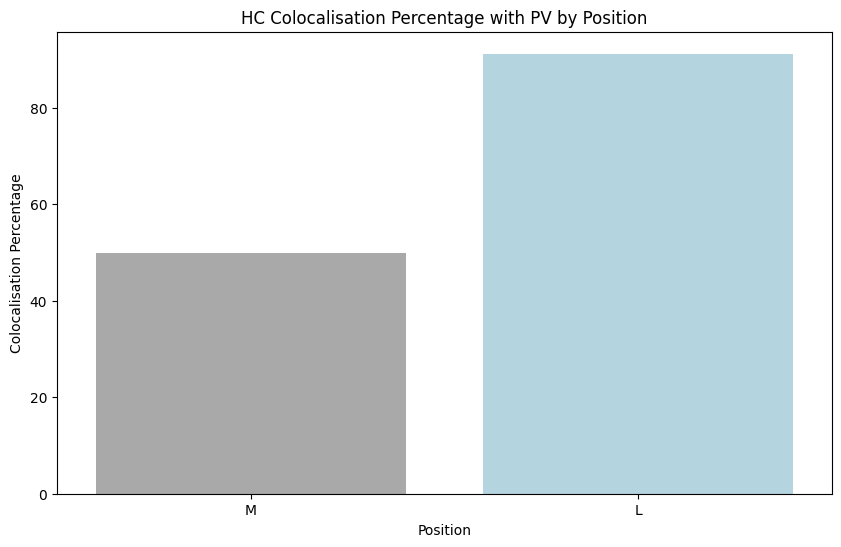

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = {"M": "darkgrey", "L": "lightblue"}  

# Define order of categories
order = ["M", "L"]

# Create the barplot
plt.figure(figsize=(10, 6))
plot = sns.barplot(
    data=merged_counts,
    x="Position",
    y="Colocalisation Percentage",
    hue="Position",
    palette=custom_palette, order = order
)

# Adjust aesthetics
plt.title("HC Colocalisation Percentage with PV by Position")
plt.xlabel("Position")
plt.ylabel("Colocalisation Percentage")
#plt.legend(title="Type")

# Show plot
plt.show()

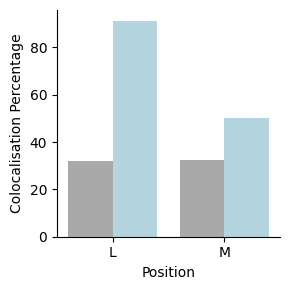

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette (adjust as needed)
custom_palette = {"Other": "darkgrey", "HC": "lightblue"}

# Set hue order (Other first, then HC)
hue_order = ["Other", "HC"]

# Create FacetGrid to split by Lumbar Segment
g = sns.FacetGrid(merged_counts,  sharey=True)

# Map the barplot with the custom color palette
g.map_dataframe(
    sns.barplot, 
    x="Position", 
    y="Colocalisation Percentage", 
    hue="Typ", 
    hue_order=hue_order, 
    palette=custom_palette, 
    linewidth=2.5
)

# Adjust titles and legends
#g.set_titles("Lumbar Segment: {col_name}")
#g.add_legend(title="Type")

# Show plot
plt.show()


In [352]:

area = Data[(Data["Typ"] == "HC") & (Data["Position"] == "M")]


In [351]:
Data

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation VGLUT,Colocalisation PV,Colocalisation VGLUT and PV,Volume,Volume Unit
0,0.00000,µm,Surface,VGLUT1,1,Other,3,1.686860,7.623950,L,yes,no,no,0.198994,µm^3
1,4.88405,µm,Surface,VGLUT1,1,Other,4,0.011833,7.035610,L,no,yes,no,0.157989,µm^3
2,1.71514,µm,Surface,VGLUT1,1,Other,8,2.909320,1.368490,L,no,no,no,0.279431,µm^3
3,0.00000,µm,Surface,VGLUT1,1,Other,9,3.578380,1.147080,L,yes,no,no,0.342970,µm^3
4,2.90312,µm,Surface,VGLUT1,1,Other,13,1.767960,2.904940,L,no,no,no,0.427310,µm^3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524311,0.95717,µm,Surface,VGLUT1,1,Other,39043,1.607600,1.138220,L,no,no,no,0.193417,µm^3
524312,2.33015,µm,Surface,VGLUT1,1,Other,39045,0.133110,5.080200,L,no,no,no,0.133593,µm^3
524313,2.69374,µm,Surface,VGLUT1,1,Other,39046,1.336200,0.973674,L,no,no,no,0.084138,µm^3
524314,1.87653,µm,Surface,VGLUT1,1,Other,39047,-0.315192,3.370190,L,no,yes,no,0.437347,µm^3


In [353]:
area

,Shortest Distance to VGLUT1,Unit,Category,Surfaces,Time,Typ,ID,Shortest Distance to PV,Shortest Distance to MMP9,Position,Colocalisation VGLUT,Colocalisation PV,Colocalisation VGLUT and PV,Volume,Volume Unit
76996,0.00000,µm,Surface,VGLUT1,1,HC,2581,0.00000,2.944450,M,yes,yes,yes,1.59163,µm^3
98287,0.00000,µm,Surface,VGLUT1,1,HC,35108,0.00000,2.023030,M,yes,yes,yes,1.77492,µm^3
104062,6.22044,µm,Surface,VGLUT1,1,HC,44088,1.31971,0.922894,M,no,no,no,1.89893,µm^3
202126,3.23623,NaN,Surface,VGLUT1,1,HC,37244,1.48012,3.263960,M,no,no,no,2.21184,µm^3


In [331]:
area_by_position_typ = (
    Data[Data["Typ"] == "HC"]
    .groupby(["Position", "Typ"])  # Adjust grouping as needed
    .size()  # Correct usage (returns count per group)
    .reset_index(name="Colocalised Count")  # Converts to DataFrame
)
area_by_position_typ

,Position,Typ,Colocalised Count
0,L,HC,57
1,M,HC,4


# Question 1
## What percentage of Honeycomb Synapses compared to non-Honeycomb Synapses are colocalised with VGLUT1 and/or PV?

In [268]:
# Determine total number of synapses by synapse subtype
TotalRowsByTyp = Data.groupby('Typ').size()
TotalRowsByTyp

Typ
HC           61
Other    524255
dtype: int64

In [269]:
# Calculate percentages of synapses colocalised with VGLUT1 and/or PV for HC and Non-HC synapses
onlyVGLUT = Data[(Data['Colocalisation VGLUT'] == 'yes') & (Data['Colocalisation PV'] == 'no')].groupby('Typ').size() / TotalRowsByTyp * 100 #percentage of synapses colocalised only with VGLUT1
onlyPV = Data[(Data['Colocalisation PV'] == 'yes') & (Data['Colocalisation VGLUT'] =='no')].groupby('Typ').size() / TotalRowsByTyp * 100 #percentage of synapses colocalised only with PV
VGLUTandPV = Data[(Data['Colocalisation VGLUT'] == 'yes') & (Data['Colocalisation PV'] == 'yes')].groupby('Typ').size() / TotalRowsByTyp * 100 #percentage of synapses colocalised with VGLUT1 and PV


In [270]:
# Determine percentage of synapses by subtypes not colocalised with PV and/or VGLUT1
NoColocalisation = 100 - (onlyVGLUT + onlyPV + VGLUTandPV)

In [271]:
# give specific values
onlyVGLUT

Typ
HC       6.557377
Other    3.082469
dtype: float64

In [272]:
onlyPV

Typ
HC        8.196721
Other    28.371117
dtype: float64

In [273]:
VGLUTandPV

Typ
HC       80.327869
Other     3.942166
dtype: float64

In [274]:
NoColocalisation

Typ
HC        4.918033
Other    64.604248
dtype: float64

In [277]:
# Create a data frame for plotting
PlottingData = pd.DataFrame({ 'Only VGLUT1': onlyVGLUT, 'Only PV': onlyPV,'VGLUT1 + PV': VGLUTandPV,'No Colocalisation': NoColocalisation})
PlottingData

,Only VGLUT1,Only PV,VGLUT1 + PV,No Colocalisation
Typ,,,,
HC,6.557377,8.196721,80.327869,4.918033
Other,3.082469,28.371117,3.942166,64.604248


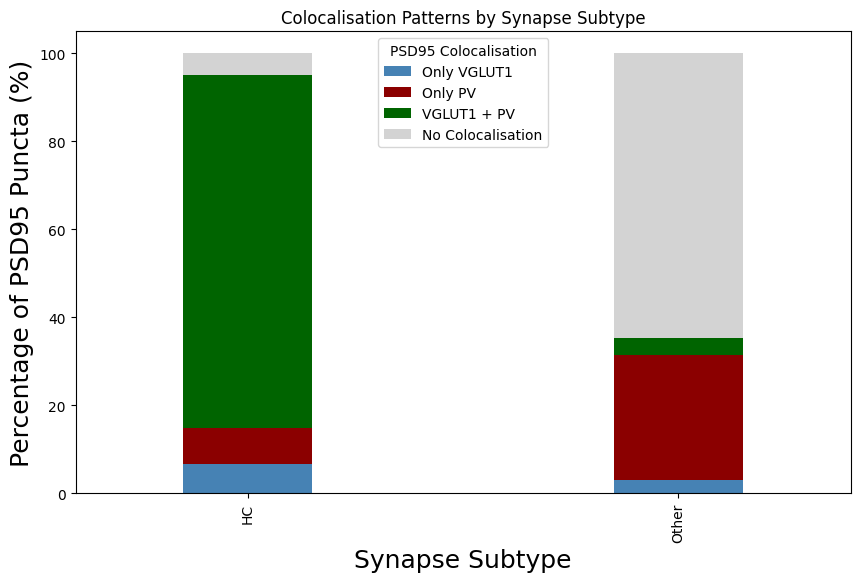

In [278]:
# Plotting the stacked bar graph
PlottingData.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.3, color=['steelblue', 'darkred', 'darkgreen', 'lightgrey'])

plt.title("Colocalisation Patterns by Synapse Subtype")
plt.ylabel("Percentage of PSD95 Puncta (%)", fontsize = 18)
plt.xlabel("Synapse Subtype", fontsize = 18)
plt.legend(title="PSD95 Colocalisation", loc = 'upper center')
plt.show()

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Determine total number of synapses by synapse subtype **and Position**
TotalRowsByTypPosition = ColocData.groupby(['Typ', 'Position']).size()
TotalRowsByTypPosition

Typ    Position
HC     L               57
       M                4
Other  L           335507
       M           188748
dtype: int64

In [44]:
# Calculate percentages of synapses colocalised with VGLUT1 and/or PV for HC and Non-HC synapses **by Position**
onlyVGLUT = (
    ColocData[(ColocData['Colocalisation VGLUT'] == 'yes') & (ColocData['Colocalisation PV'] == 'no')]
    .groupby(['Typ', 'Position'])
    .size() / TotalRowsByTypPosition * 100  # Normalize by total count
)


onlyVGLUT.fillna(0, inplace=True)
onlyVGLUT

Typ    Position
HC     L           7.017544
       M           0.000000
Other  L           3.011860
       M           3.207981
dtype: float64

In [45]:
onlyPV = (
   ColocData[(ColocData['Colocalisation PV'] == 'yes') & (ColocData['Colocalisation VGLUT'] == 'no')]
    .groupby(['Typ', 'Position'])
    .size() / TotalRowsByTypPosition * 100
)
onlyPV.fillna(0, inplace=True)
onlyPV

Typ    Position
HC     L            8.771930
       M            0.000000
Other  L           28.096582
       M           28.859114
dtype: float64

In [46]:
VGLUTandPV = (
    ColocData[(ColocData['Colocalisation VGLUT'] == 'yes') & (ColocData['Colocalisation PV'] == 'yes')]
    .groupby(['Typ', 'Position'])
    .size() / TotalRowsByTypPosition * 100
)
VGLUTandPV.fillna(0, inplace=True)
VGLUTandPV

Typ    Position
HC     L           82.456140
       M           50.000000
Other  L            4.063403
       M            3.726662
dtype: float64

In [47]:
# Determine percentage of synapses **not** colocalised with PV and/or VGLUT1
NoColocalisation = 100 - (onlyVGLUT + onlyPV + VGLUTandPV)
NoColocalisation

Typ    Position
HC     L            1.754386
       M           50.000000
Other  L           64.828156
       M           64.206243
dtype: float64

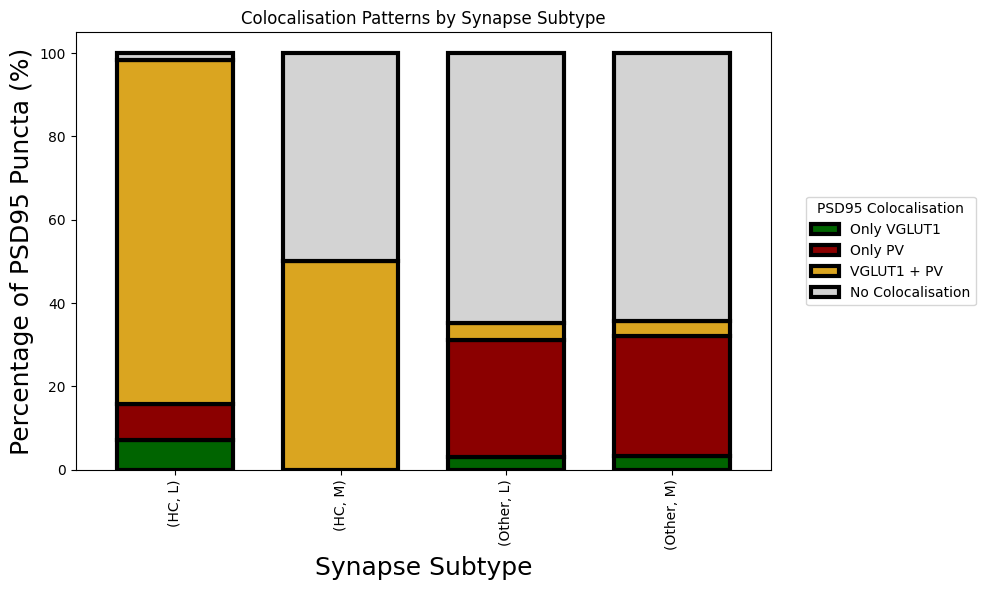

In [52]:
import matplotlib.pyplot as plt

# Create a DataFrame for plotting
PlottingData = pd.DataFrame({
    'Only VGLUT1': onlyVGLUT, 
    'Only PV': onlyPV,
    'VGLUT1 + PV': VGLUTandPV,
    'No Colocalisation': NoColocalisation
}).reset_index()

# Adjust figure size for extra space for legend
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked bar graph
PlottingData.set_index(['Typ','Position']).plot(
    kind='bar', 
    stacked=True, 
    ax=ax,
    width=0.7,
    color=['darkgreen', 'darkred', 'goldenrod', 'lightgrey'],
    edgecolor='black',
    linewidth=3
)

# Adjust labels and title
plt.title("Colocalisation Patterns by Synapse Subtype")
plt.ylabel("Percentage of PSD95 Puncta (%)", fontsize=18)
plt.xlabel("Synapse Subtype", fontsize=18)

# Move legend outside the plot (to the right)
plt.legend(
    title="PSD95 Colocalisation",
    bbox_to_anchor=(1.05, 0.5),  # (x, y) - Moves legend outside plot
    loc='center left',            # Aligns legend to the left of bbox
    borderaxespad=0               # Removes extra padding
)

# Adjust layout so everything fits
plt.tight_layout()

# Show plot
plt.show()


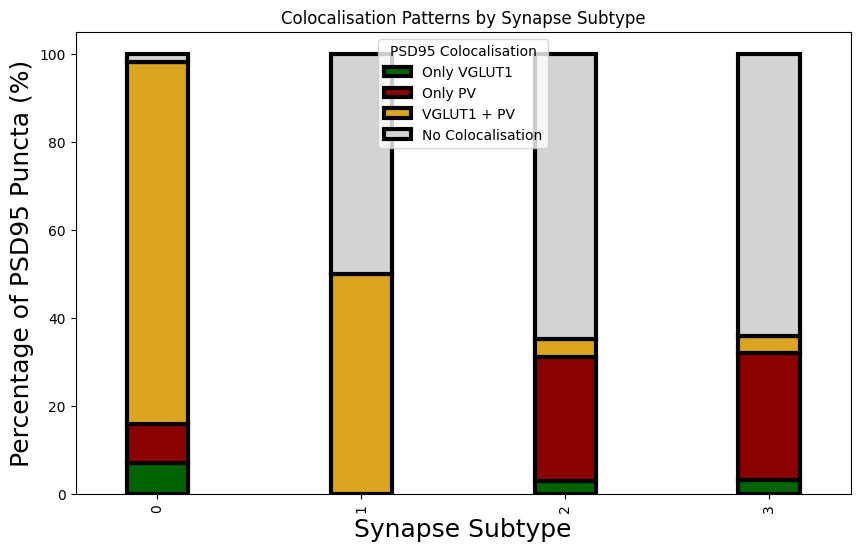

In [269]:



# Create a DataFrame for plotting
PlottingData = pd.DataFrame({
    'Only VGLUT1': onlyVGLUT, 
    'Only PV': onlyPV,
    'VGLUT1 + PV': VGLUTandPV,
    'No Colocalisation': NoColocalisation
}).reset_index()

# Plotting the stacked bar graph
PlottingData.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    width=0.3,
    color=['darkgreen', 'darkred', 'goldenrod', 'lightgrey'],
    edgecolor = 'black',
    linewidth = 3
)

plt.title("Colocalisation Patterns by Synapse Subtype")
plt.ylabel("Percentage of PSD95 Puncta (%)", fontsize = 18)
plt.xlabel("Synapse Subtype", fontsize = 18)
plt.legend(title="PSD95 Colocalisation", loc = 'upper center')
#plt.savefig("Colocalisation by Type.png", transparent = True)
plt.show()
# Show plot
plt.show()


# plotting percentage of HC by Position

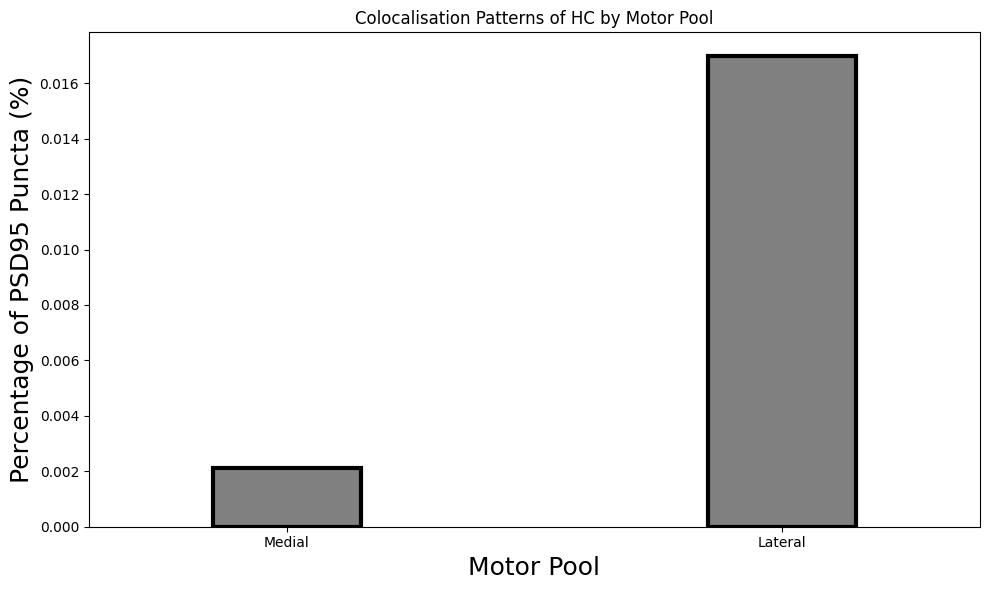

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame with separate bars
#PlottingData = pd.DataFrame({
    #'Percentage': [0.00002119227753 * 100, 0.000169863275 * 100]
#}, index=['Medial', 'Lateral'])

# Create DataFrame with separate bars
PlottingData = pd.DataFrame({
    'Percentage': [(4/(181714 + 4 + 7034)) * 100, (57/(57 + 13633 + 321874)) * 100]
}, index=['Medial', 'Lateral'])



# Plotting the side-by-side bar graph
PlottingData.plot(
    kind='bar',
    figsize=(10, 6),
    width=0.3,
    color=['grey'],
    edgecolor='black',
    linewidth=3,
    legend=False  # No need for legend since index labels act as x-axis
)

plt.title("Colocalisation Patterns of HC by Motor Pool")
plt.ylabel("Percentage of PSD95 Puncta (%)", fontsize=18)
plt.xlabel("Motor Pool", fontsize=18)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [ ]:
# model to test

In [143]:
PlottingData

,Percentage
Medial,0.002119
Lateral,0.016986


# Answer Question 1
The colocalisation patterns differ between Honeycomb and Non-Honeycomb Synapses. The vast majority of Honeycomb Synapses (80.3%) are colocalised with both VGLUT1 and PV, indicating that thez are part of the MSR pathway. An additional 8.2% are colocalised with PV but not VGLUT1 and 6.6% are colocalised with VGLUT1 but not PV. Importantly, only 4.9% of Honeycomb Synapses do not colocalise with either PV or VGLUT1. Therefore a total of 95.1% of Honeycomb Synapses colocalise with either PV and/or VGLUT1.
This colocalisation pattern differs in Non-Honeycomb Synapses. The majority of Non-Honeycomb Synapses (64.6%) do not colocalise with PV or VGLUT1. 28.4% of Non-Honeycomb Synapses colocalise with PV but not VGLUT1, and 3.1% of Non-Honeycomb Synapses colocalise with VGLUT1, but not PV. Only 3.9% of Non-Honeycomb Synapses colocalise with both PV and VGLUT1. Therefore, a total of 55.4% of Non-Honeycomb Synapses colocalise with either PV and/or VGLUT1.

From a neurobiological perspective these data indicate that the majority of Honeycomb Synapses are part of the Monosynaptic Stretch Reflex Pathway. Honeycomb synapses are more frequently associated with this pathway than other, Non-Honeycomb PSD95 structures. Further experiments are needed to determine which neurons the 4.9% of Honeycomb synapses, that are not colocalised with PV and/or VGLUT1 receive input from.

# Question 2 
## Only looking at synapses that are part of the MSR, do Honeycomb Synapses differ in size from Non-Honeycomb Synapses?

### looking at volume data

In [281]:
FilteredData = Data[Data['Colocalisation VGLUT and PV'] == 'yes'] 

In [291]:
# Calculate the mean Volume for each synapse subtype
MeanBySubtype = FilteredData.groupby('Typ')['Volume'].mean()
MeanBySubtype

Typ
HC       2.470439
Other    0.473817
Name: Volume, dtype: float64

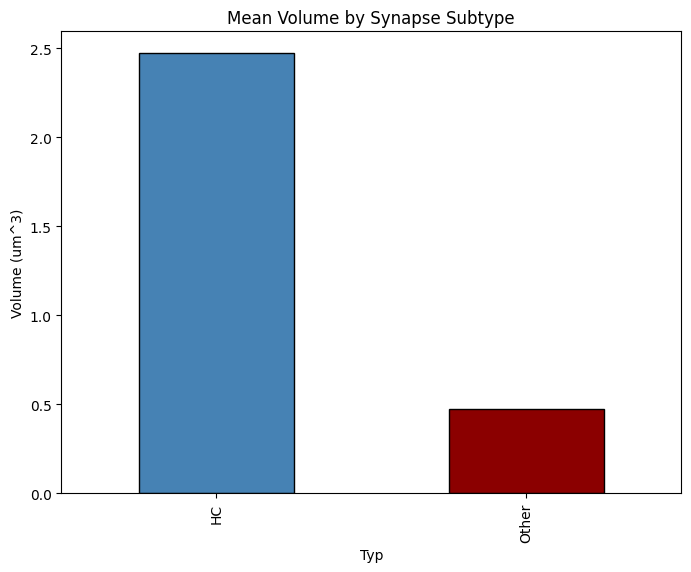

In [282]:
# Plot the means as a bar chart
plt.figure(figsize=(8, 6))
MeanBySubtype.plot(kind='bar', color=['steelblue', 'darkred'], edgecolor='black')

# Add labels, title, and grid
plt.ylabel('Volume (um^3)')
plt.title('Mean Volume by Synapse Subtype')
#plt.xticks(rotation=0)
plt.grid(axis='y', linestyle ='', alpha=0.7)

# Show the plot
plt.show()

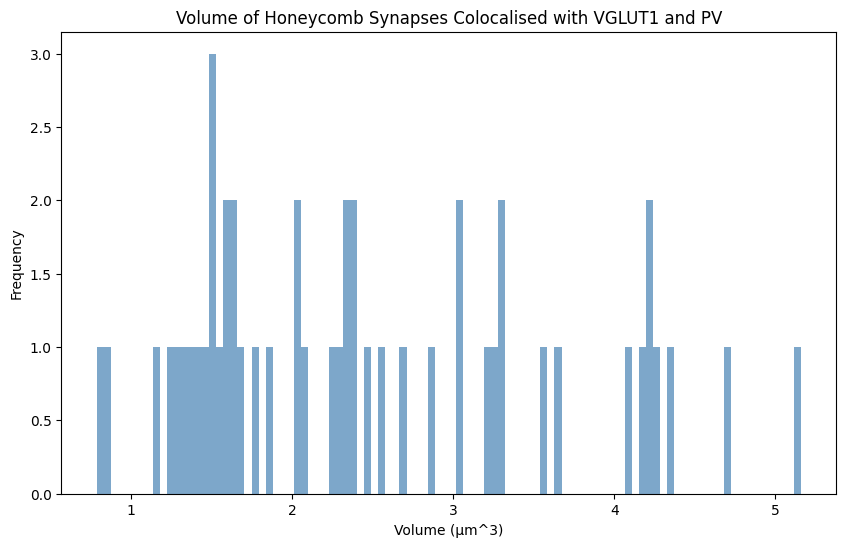

In [284]:
# plotting frequency histogram of Volume for Honeycomb Synapse colocalised with VGLUT1
FilteredDataHC = Data[(Data['Colocalisation VGLUT and PV'] == 'yes') & (Data['Typ'] == 'HC')]

plt.figure(figsize=(10, 6))
plt.hist(FilteredDataHC['Volume'], bins=100, alpha=0.7, color='steelblue')
plt.xlabel('Volume (µm^3)')
plt.ylabel('Frequency')
plt.title('Volume of Honeycomb Synapses Colocalised with VGLUT1 and PV')
plt.grid(False)
plt.show()


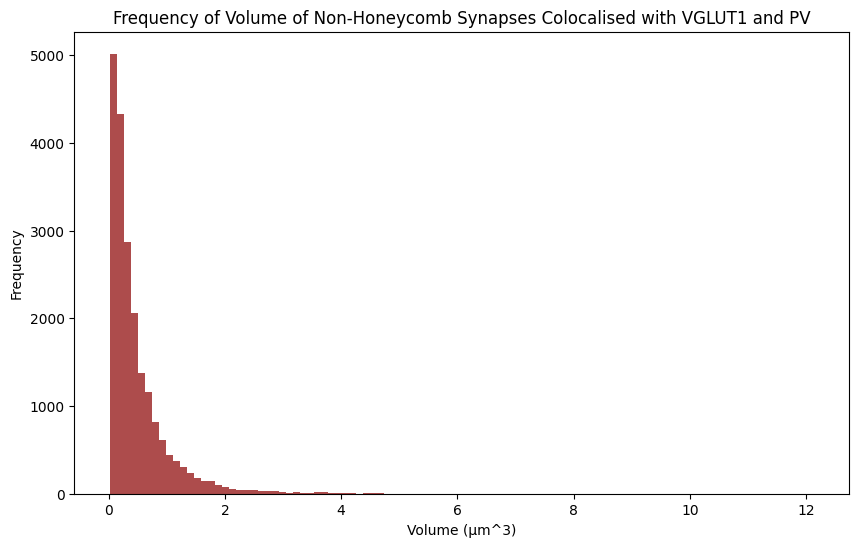

In [285]:
# plotting frequency histogram of Volume for Non-Honeycomb Synapse colocalised with VGLUT1
FilteredDataOther = Data[(Data['Colocalisation VGLUT and PV'] == 'yes') & (Data['Typ'] == 'Other')]

plt.figure(figsize=(10, 6))
plt.hist(FilteredDataOther['Volume'], bins=100, alpha=0.7, color='darkred')
plt.xlabel('Volume (µm^3)')
plt.ylabel('Frequency')
plt.title('Frequency of Volume of Non-Honeycomb Synapses Colocalised with VGLUT1 and PV')
plt.grid(False)
plt.show()

### looking at surface area data

In [292]:
# Calculate the mean surface area for each synapse subtype
MeanBySubtype2 = FilteredData.groupby('Typ')['Area'].mean()
MeanBySubtype2

Typ
HC       16.976968
Other     3.919070
Name: Area, dtype: float64

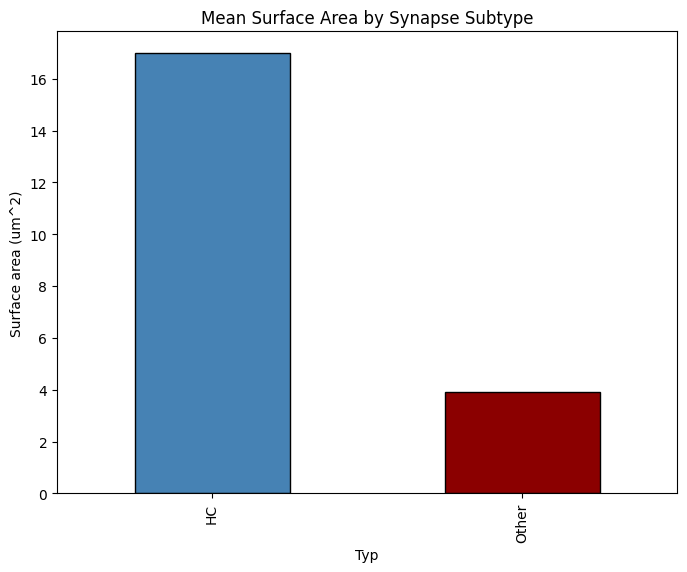

In [286]:
# Plot the means as a bar chart
plt.figure(figsize=(8, 6))
MeanBySubtype2.plot(kind='bar', color=['steelblue', 'darkred'], edgecolor='black')

# Add labels, title, and grid
plt.ylabel('Surface area (um^2)')
plt.title('Mean Surface Area by Synapse Subtype')
#plt.xticks(rotation=0)
plt.grid(axis='y', linestyle ='', alpha=0.7)

# Show the plot
plt.show()

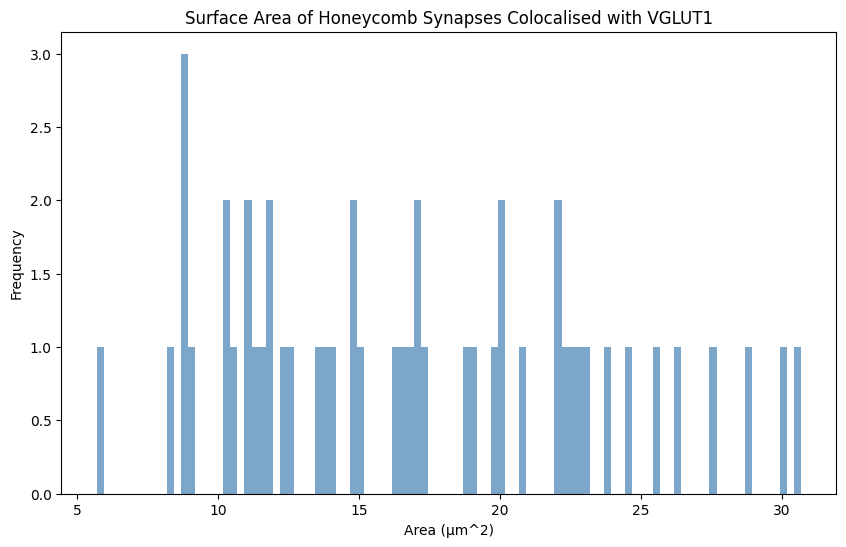

In [287]:
# plotting frequency histogram of surface area for Honeycomb Synapse colocalised with VGLUT1
FilteredDataHC = Data[(Data['Colocalisation VGLUT and PV'] == 'yes') & (Data['Typ'] == 'HC')]

plt.figure(figsize=(10, 6))
plt.hist(FilteredDataHC['Area'], bins=100, alpha=0.7, color='steelblue')
plt.xlabel('Area (µm^2)')
plt.ylabel('Frequency')
plt.title('Surface Area of Honeycomb Synapses Colocalised with VGLUT1')
plt.grid(False)
plt.show()

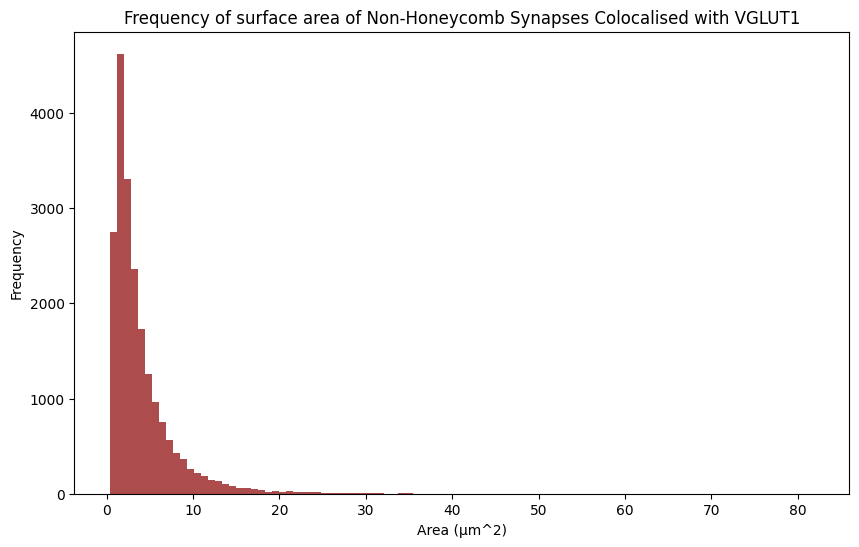

In [288]:
# plotting frequency histogram of surface area for Non-Honeycomb Synapse colocalised with VGLUT1
FilteredDataOther = Data[(Data['Colocalisation VGLUT and PV'] == 'yes') & (Data['Typ'] == 'Other')]

plt.figure(figsize=(10, 6))
plt.hist(FilteredDataOther['Area'], bins=100, alpha=0.7, color='darkred')
plt.xlabel('Area (µm^2)')
plt.ylabel('Frequency')
plt.title('Frequency of surface area of Non-Honeycomb Synapses Colocalised with VGLUT1')
plt.grid(False)
plt.show()

In [ ]:
# determining correlation of surface area and volume data

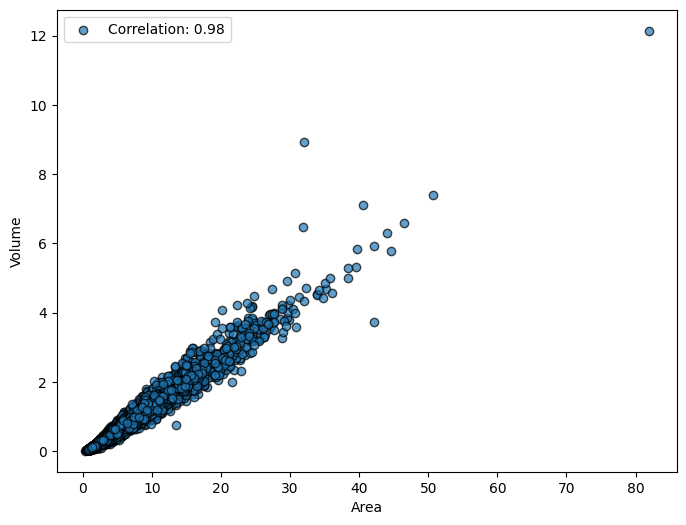

In [289]:
# Calculate the correlation coefficient
correlationCoefficient = FilteredData['Area'].corr(FilteredData['Volume'])

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(FilteredData['Area'], FilteredData['Volume'], alpha=0.7, edgecolor='k', label=f'Correlation: {correlationCoefficient:.2f}')

# Add labels and title
plt.xlabel('Area')
plt.ylabel('Volume')
plt.title('')
plt.legend()
plt.grid(False)
plt.show()


# Answer Question 2
The data indicate that Honeycomb Synapses in the MSR are larger than Non-Honeycomb Synapses in the MSR. This is indicated by the mean volume and mean surface area, which are larger in Honeycomb compared to Non-Honeycomb Synapses. Moreover, we can be certain that these data are not skewed due to an outlier, by looking at the distribution of surface area and volume data. Further, surface area and volume data are highly correlated. Therefore, in future investigations of synapse size it will be sufficient to look at only one parameter (volume or surface area). 
Neurobiologically, these data are interesting since "form follows function", indicating a specialised role for Honeycomb synapses in the MSR. Future experiments will focus on determining this function.

In [1]:
import nbformat
import re

def extract_imports_from_notebook(path):
    with open(path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    
    code_cells = [cell['source'] for cell in nb.cells if cell['cell_type'] == 'code']
    all_code = '\n'.join(code_cells)
    
    # Match both `import xxx` and `from xxx import yyy`
    imports = re.findall(r'^\s*(?:import|from)\s+([a-zA-Z0-9_\.]+)', all_code, re.MULTILINE)
    return sorted(set(imports))

# Example
used_packages = extract_imports_from_notebook("Project.ipynb")
print(used_packages)


['matplotlib.pyplot', 'numpy', 'pandas', 'seaborn', 'statsmodels.api', 'statsmodels.formula.api', 'statsmodels.stats.multitest']
